In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
zip_path = '/content/drive/MyDrive/packet_features.zip'


In [5]:
import zipfile
import os

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall('packet_features')


In [6]:
os.listdir('packet_features')


['sparta.csv',
 'scan_A.csv',
 'normal.csv',
 'scan_sU.csv',
 'mqtt_bruteforce.csv']

In [7]:
path = "packet_features/"

for f in os.listdir(path):
    print(f, os.path.getsize(path + f) / (1024*1024), "MB")


sparta.csv 2120.7307987213135 MB
scan_A.csv 11.721502304077148 MB
normal.csv 111.53668975830078 MB
scan_sU.csv 24.410694122314453 MB
mqtt_bruteforce.csv 1086.0029106140137 MB


# Task
Load and prepare the `sparta.csv` dataset, including inspecting data, addressing data types, handling missing values, balancing classes, and splitting data into training and testing sets.

## Load Dataset

### Subtask:
Load the `sparta.csv` file into a pandas DataFrame, as requested.


**Reasoning**:
First, I'll import the pandas library to handle dataframes and then load the 'sparta.csv' file into a pandas DataFrame named 'df_sparta', and display the first few rows to verify the loading.



In [ ]:
import pandas as pd

file_path = path + 'sparta.csv'
df_sparta = pd.read_csv(file_path)
df_sparta.head()

## Inspect Data

### Subtask:
Perform an initial inspection of the loaded dataset to understand its structure, including displaying the first few rows, checking data types, and summarizing basic statistics. This will help identify any immediate issues.


**Reasoning**:
To begin the inspection, I will display the first 5 rows, show the DataFrame's info to understand data types and non-null counts, and then provide descriptive statistics for numerical columns.



**Reasoning**:
The previous cell failed with a `NameError` because `df_sparta` was not defined, indicating that the preceding cells responsible for defining `path` and loading the `df_sparta` DataFrame were not executed. To fix this, the current cell needs to include the necessary code to import pandas, define the `path` variable, and load `df_sparta` before performing the inspection steps.



# Task
Load and prepare the `sparta.csv` dataset from the `packet_features/` directory, including inspecting data, addressing data types, handling missing values, balancing classes, and splitting data into training and testing sets.

## Load and Check Dimensions

### Subtask:
Ensure the `sparta.csv` dataset is successfully loaded into a pandas DataFrame and then display its dimensions (number of rows and columns) to get an immediate overview.


**Reasoning**:
To address the subtask, I will reload the `sparta.csv` dataset into a pandas DataFrame, ensuring `path` is defined for robustness, and then display its dimensions (number of rows and columns) using the `.shape` attribute to confirm successful loading and initial overview.



In [ ]:
import pandas as pd

# Ensure 'path' is defined in case previous cells were not executed or failed
path = "packet_features/"

# Load df_sparta, handling potential large file issues if any
try:
    df_sparta = pd.read_csv(path + 'sparta.csv')
    print("Dataset loaded successfully.")
    print(f"DataFrame dimensions: {df_sparta.shape[0]} rows, {df_sparta.shape[1]} columns.")
except Exception as e:
    print(f"Error loading dataset: {e}")

**Reasoning**:
To address the subtask, I will reload the `sparta.csv` dataset into a pandas DataFrame, ensuring `path` is defined for robustness, and then display its dimensions (number of rows and columns) using the `.shape` attribute to confirm successful loading and initial overview.



In [ ]:
import pandas as pd

# Ensure 'path' is defined in case previous cells were not executed or failed
path = "packet_features/"

# Load df_sparta, handling potential large file issues if any
try:
    df_sparta = pd.read_csv(path + 'sparta.csv')
    print("Dataset loaded successfully.")
    print(f"DataFrame dimensions: {df_sparta.shape[0]} rows, {df_sparta.shape[1]} columns.")
except Exception as e:
    print(f"Error loading dataset: {e}")

**Reasoning**:
The provided code block correctly addresses the subtask of loading the `sparta.csv` dataset into a pandas DataFrame and displaying its dimensions. Since this action is critical for confirming the dataset's readiness for further inspection, it is an appropriate next step.



# Task
Load only the first 200,000 rows of the `sparta.csv` dataset into a pandas DataFrame to prevent memory issues, and then display its dimensions (number of rows and columns) to confirm successful partial loading and initial overview.

## Load and Check Dimensions (First 200,000 Rows)

### Subtask:
Load only the first 200,000 rows of the `sparta.csv` dataset into a pandas DataFrame to prevent memory issues, and then display its dimensions (number of rows and columns) to confirm successful partial loading and initial overview.


**Reasoning**:
To load only the first 200,000 rows of `sparta.csv` and display its dimensions, I will import pandas, define the `path` variable, use `pd.read_csv` with the `nrows` parameter to load the data, and then print the shape of the resulting DataFrame.



In [2]:
import pandas as pd

# Define the path to the dataset
path = "packet_features/"

# Load only the first 200,000 rows of sparta.csv
try:
    df_sparta = pd.read_csv(path + 'sparta.csv', nrows=200000)
    print("Dataset 'sparta.csv' (first 200,000 rows) loaded successfully.")
    print(f"DataFrame dimensions: {df_sparta.shape[0]} rows, {df_sparta.shape[1]} columns.")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset 'sparta.csv' (first 200,000 rows) loaded successfully.
DataFrame dimensions: 200000 rows, 31 columns.


## Initial Data Type and Null Value Scan

### Subtask:
Perform a quick scan to understand the data types of columns and identify the presence of null values across the dataset. This step will help us prioritize further preprocessing without performing heavy computations.


**Reasoning**:
To perform a quick scan of data types and null values, I will first display the head of the DataFrame for a visual check, then use `.info()` for data types and non-null counts, and finally calculate the percentage of missing values for each column, sorted in descending order.



In [3]:
print("First 5 rows of the DataFrame:")
print(df_sparta.head())

print("\nConcise summary of the DataFrame (data types and non-null counts):")
df_sparta.info()

print("\nPercentage of missing values per column:")
missing_values = df_sparta.isnull().sum()
missing_percentage = (missing_values / len(df_sparta)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)
print(missing_percentage[missing_percentage > 0])

First 5 rows of the DataFrame:
                     timestamp       src_ip       dst_ip protocol  ttl  \
0  02/14/2020, 16:43:38:808388    10.0.0.23  192.168.2.7     DATA   64   
1  02/14/2020, 16:43:38:951447    10.0.0.13  192.168.1.7      TCP   64   
2  02/14/2020, 16:43:38:951764  192.168.1.7    10.0.0.13      TCP   63   
3  02/14/2020, 16:43:38:952104    10.0.0.11  192.168.1.7      TCP   64   
4  02/14/2020, 16:43:38:952110    10.0.0.13  192.168.1.7      TCP   64   

   ip_len  ip_flag_df  ip_flag_mf  ip_flag_rb  src_port  ...  \
0    1344           1           0           0     47103  ...   
1      60           1           0           0     56870  ...   
2      60           1           0           0      1883  ...   
3      60           1           0           0     42500  ...   
4      52           1           0           0     56870  ...   

   mqtt_messagetype  mqtt_messagelength  mqtt_flag_uname  mqtt_flag_passwd  \
0               NaN                 NaN              NaN     

## Identify Columns for Dropping

### Subtask:
Based on the data type and null value scan, identify columns that might be candidates for dropping, such as those with excessive missing values, constant values, or irrelevant identifiers. We will analyze unique values for object columns to help in this decision.


**Reasoning**:
To identify columns with a high percentage of missing values, I will filter the previously calculated `missing_percentage` Series for values greater than 90%. Then, to identify columns with constant values, I will iterate through all columns in `df_sparta` and check if `nunique()` equals 1. Finally, I will explicitly calculate the unique value counts for the specified object columns: 'timestamp', 'src_ip', 'dst_ip', and 'protocol' to assess their cardinality.



In [4]:
print("\nColumns with more than 90% missing values:")
high_missing_columns = missing_percentage[missing_percentage > 90].index.tolist()
print(high_missing_columns)

print("\nColumns with a single unique value (constant columns):")
constant_columns = [col for col in df_sparta.columns if df_sparta[col].nunique() == 1]
print(constant_columns)

print("\nUnique value counts for specific object columns:")
object_cols_to_check = ['timestamp', 'src_ip', 'dst_ip', 'protocol']
for col in object_cols_to_check:
    if col in df_sparta.columns:
        print(f"'{col}': {df_sparta[col].nunique()} unique values")


Columns with more than 90% missing values:
['mqtt_flag_uname', 'mqtt_flag_retain', 'mqtt_flag_passwd', 'mqtt_flag_willflag', 'mqtt_flag_clean', 'mqtt_flag_reserved', 'mqtt_flag_qos', 'mqtt_messagetype', 'mqtt_messagelength']

Columns with a single unique value (constant columns):
['ip_flag_df', 'ip_flag_mf', 'ip_flag_rb', 'tcp_flag_res', 'tcp_flag_ns', 'tcp_flag_cwr', 'tcp_flag_ecn', 'tcp_flag_urg', 'mqtt_flag_uname', 'mqtt_flag_passwd', 'mqtt_flag_retain', 'mqtt_flag_qos', 'mqtt_flag_willflag', 'mqtt_flag_clean', 'mqtt_flag_reserved']

Unique value counts for specific object columns:
'timestamp': 199812 unique values
'src_ip': 17 unique values
'dst_ip': 19 unique values
'protocol': 9 unique values


### Identified Columns for Dropping

Based on the analysis, the following columns are candidates for dropping:

*   **Columns with more than 90% missing values:**
    *   `mqtt_flag_uname`
    *   `mqtt_flag_retain`
    *   `mqtt_flag_passwd`
    *   `mqtt_flag_willflag`
    *   `mqtt_flag_clean`
    *   `mqtt_flag_reserved`
    *   `mqtt_flag_qos`
    *   `mqtt_messagetype`
    *   `mqtt_messagelength`

*   **Columns with a single unique value (constant columns):**
    *   `ip_flag_df`
    *   `ip_flag_mf`
    *   `ip_flag_rb`
    *   `tcp_flag_res`
    *   `tcp_flag_ns`
    *   `tcp_flag_cwr`
    *   `tcp_flag_ecn`
    *   `tcp_flag_urg`
    *   `mqtt_flag_uname` (also in high missing)
    *   `mqtt_flag_passwd` (also in high missing)
    *   `mqtt_flag_retain` (also in high missing)
    *   `mqtt_flag_qos` (also in high missing)
    *   `mqtt_flag_willflag` (also in high missing)
    *   `mqtt_flag_clean` (also in high missing)
    *   `mqtt_flag_reserved` (also in high missing)

*   **Irrelevant identifiers (high cardinality object columns):**
    *   `timestamp` (199812 unique values out of 200000 rows, effectively unique and not useful for direct modeling)

Note that some `mqtt_flag` columns appear in both the 'high missing' and 'constant columns' categories, reinforcing their irrelevance.

## Address Data Types

### Subtask:
Examine the data types of each column more closely and convert them to appropriate formats (e.g., numeric, categorical, datetime) if necessary, considering the potential impact on performance for large columns.


**Reasoning**:
To address the instructions, I will convert the 'timestamp' column to datetime objects and the 'protocol' column to the 'category' data type to optimize memory and prepare for encoding. Then, I will display the DataFrame's info to verify the data type changes.



In [5]:
print("Original data types:")
df_sparta.info()

# 1. Convert 'timestamp' column to datetime objects
df_sparta['timestamp'] = pd.to_datetime(df_sparta['timestamp'], format='%m/%d/%Y, %H:%M:%S:%f')

# 2. Convert 'protocol' column to 'category' data type
df_sparta['protocol'] = df_sparta['protocol'].astype('category')

print("\nData types after conversion:")
df_sparta.info()

Original data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   timestamp           200000 non-null  object 
 1   src_ip              200000 non-null  object 
 2   dst_ip              200000 non-null  object 
 3   protocol            200000 non-null  object 
 4   ttl                 200000 non-null  int64  
 5   ip_len              200000 non-null  int64  
 6   ip_flag_df          200000 non-null  int64  
 7   ip_flag_mf          200000 non-null  int64  
 8   ip_flag_rb          200000 non-null  int64  
 9   src_port            200000 non-null  int64  
 10  dst_port            200000 non-null  int64  
 11  tcp_flag_res        199050 non-null  float64
 12  tcp_flag_ns         199050 non-null  float64
 13  tcp_flag_cwr        199050 non-null  float64
 14  tcp_flag_ecn        199050 non-null  float64
 15  tcp_flag_urg 

## Handle Missing Values

### Subtask:
Strategize and apply methods to handle missing values, which may include imputation (mean, median, mode), or removal of rows/columns, depending on the extent and nature of the missing data.


**Reasoning**:
First, I will combine all identified columns for dropping into a single list and remove them from the DataFrame. Then, I will impute missing values in the specified `tcp_flag_` columns using their mode, and finally, verify that no missing values remain in the DataFrame.



In [6]:
columns_to_drop = [
    'mqtt_flag_uname', 'mqtt_flag_retain', 'mqtt_flag_passwd', 'mqtt_flag_willflag',
    'mqtt_flag_clean', 'mqtt_flag_reserved', 'mqtt_flag_qos', 'mqtt_messagetype',
    'mqtt_messagelength', 'ip_flag_df', 'ip_flag_mf', 'ip_flag_rb',
    'tcp_flag_res', 'tcp_flag_ns', 'tcp_flag_cwr', 'tcp_flag_ecn', 'tcp_flag_urg',
    'timestamp'
]

# Drop the identified columns
df_sparta = df_sparta.drop(columns=columns_to_drop, errors='ignore')
print(f"Columns dropped. Remaining columns: {df_sparta.shape[1]}")

# Columns to impute missing values with mode
columns_to_impute_mode = [
    'tcp_flag_ack', 'tcp_flag_push', 'tcp_flag_reset', 'tcp_flag_syn', 'tcp_flag_fin'
]

for col in columns_to_impute_mode:
    if col in df_sparta.columns:
        mode_value = df_sparta[col].mode()[0]
        df_sparta[col].fillna(mode_value, inplace=True)
        print(f"Missing values in '{col}' imputed with mode: {mode_value}")

# Verify no remaining missing values
total_missing_after_handling = df_sparta.isnull().sum().sum()
print(f"\nTotal missing values after handling: {total_missing_after_handling}")

# Display info to show new column count and verify data types
print("\nDataFrame info after handling missing values and dropping columns:")
df_sparta.info()

Columns dropped. Remaining columns: 13
Missing values in 'tcp_flag_ack' imputed with mode: 1.0
Missing values in 'tcp_flag_push' imputed with mode: 0.0
Missing values in 'tcp_flag_reset' imputed with mode: 0.0
Missing values in 'tcp_flag_syn' imputed with mode: 0.0
Missing values in 'tcp_flag_fin' imputed with mode: 0.0


/tmp/ipython-input-1423380479.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sparta[col].fillna(mode_value, inplace=True)



Total missing values after handling: 0

DataFrame info after handling missing values and dropping columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   src_ip          200000 non-null  object  
 1   dst_ip          200000 non-null  object  
 2   protocol        200000 non-null  category
 3   ttl             200000 non-null  int64   
 4   ip_len          200000 non-null  int64   
 5   src_port        200000 non-null  int64   
 6   dst_port        200000 non-null  int64   
 7   tcp_flag_ack    200000 non-null  float64 
 8   tcp_flag_push   200000 non-null  float64 
 9   tcp_flag_reset  200000 non-null  float64 
 10  tcp_flag_syn    200000 non-null  float64 
 11  tcp_flag_fin    200000 non-null  float64 
 12  is_attack       200000 non-null  int64   
dtypes: category(1), float64(5), int64(5), object(2)
memory usage: 18.5+ MB


**Reasoning**:
The previous code produced a `FutureWarning` due to the use of `inplace=True` with chained assignment, which is deprecated. To resolve this, I will modify the imputation logic to use direct assignment instead of `inplace=True` for `fillna`.



In [7]:
columns_to_drop = [
    'mqtt_flag_uname', 'mqtt_flag_retain', 'mqtt_flag_passwd', 'mqtt_flag_willflag',
    'mqtt_flag_clean', 'mqtt_flag_reserved', 'mqtt_flag_qos', 'mqtt_messagetype',
    'mqtt_messagelength', 'ip_flag_df', 'ip_flag_mf', 'ip_flag_rb',
    'tcp_flag_res', 'tcp_flag_ns', 'tcp_flag_cwr', 'tcp_flag_ecn', 'tcp_flag_urg',
    'timestamp'
]

# Drop the identified columns
df_sparta = df_sparta.drop(columns=columns_to_drop, errors='ignore')
print(f"Columns dropped. Remaining columns: {df_sparta.shape[1]}")

# Columns to impute missing values with mode
columns_to_impute_mode = [
    'tcp_flag_ack', 'tcp_flag_push', 'tcp_flag_reset', 'tcp_flag_syn', 'tcp_flag_fin'
]

for col in columns_to_impute_mode:
    if col in df_sparta.columns:
        mode_value = df_sparta[col].mode()[0]
        df_sparta[col] = df_sparta[col].fillna(mode_value)
        print(f"Missing values in '{col}' imputed with mode: {mode_value}")

# Verify no remaining missing values
total_missing_after_handling = df_sparta.isnull().sum().sum()
print(f"\nTotal missing values after handling: {total_missing_after_handling}")

# Display info to show new column count and verify data types
print("\nDataFrame info after handling missing values and dropping columns:")
df_sparta.info()

Columns dropped. Remaining columns: 13
Missing values in 'tcp_flag_ack' imputed with mode: 1.0
Missing values in 'tcp_flag_push' imputed with mode: 0.0
Missing values in 'tcp_flag_reset' imputed with mode: 0.0
Missing values in 'tcp_flag_syn' imputed with mode: 0.0
Missing values in 'tcp_flag_fin' imputed with mode: 0.0

Total missing values after handling: 0

DataFrame info after handling missing values and dropping columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   src_ip          200000 non-null  object  
 1   dst_ip          200000 non-null  object  
 2   protocol        200000 non-null  category
 3   ttl             200000 non-null  int64   
 4   ip_len          200000 non-null  int64   
 5   src_port        200000 non-null  int64   
 6   dst_port        200000 non-null  int64   
 7   tcp_flag_ack    200000 non-null

## Balance Classes

### Subtask:
Identify the target variable and analyze its class distribution. If class imbalance is detected, propose and apply suitable techniques to balance the classes.


**Reasoning**:
To begin, I will identify the target variable 'is_attack' and analyze its class distribution by calculating both the raw value counts and the percentage distribution. This will help determine if class imbalance is present and guide the selection of an appropriate balancing technique.



In [8]:
print("Value counts for 'is_attack' column:")
print(df_sparta['is_attack'].value_counts())

print("\nPercentage distribution for 'is_attack' column:")
print(df_sparta['is_attack'].value_counts(normalize=True) * 100)

Value counts for 'is_attack' column:
is_attack
1    188593
0     11407
Name: count, dtype: int64

Percentage distribution for 'is_attack' column:
is_attack
1    94.2965
0     5.7035
Name: proportion, dtype: float64


**Reasoning**:
Given the significant class imbalance where 'is_attack' class 0 represents only 5.7% of the data, I will use the SMOTE (Synthetic Minority Over-sampling Technique) algorithm to oversample the minority class (0) to balance the dataset. This requires splitting the DataFrame into features (X) and target (y) first, applying SMOTE, and then verifying the new class distribution.



**Reasoning**:
The previous cell failed because SMOTE cannot process non-numeric (string or object) data. I need to one-hot encode the categorical columns ('src_ip', 'dst_ip', and 'protocol') in the feature set 'X' before applying SMOTE to resolve this `ValueError`.



In [10]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Separate features (X) and target (y)
X = df_sparta.drop('is_attack', axis=1)
y = df_sparta['is_attack']

# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Before SMOTE
print(f"Original class distribution: {Counter(y)}")

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# After SMOTE
print(f"Resampled class distribution: {Counter(y_resampled)}")

Original class distribution: Counter({1: 188593, 0: 11407})
Resampled class distribution: Counter({0: 188593, 1: 188593})


## Split Data

### Subtask:
Prepare the cleaned and balanced dataset by splitting it into training and testing sets, which is crucial for model evaluation.


**Reasoning**:
To prepare the data for model evaluation, I will split the `X_resampled` and `y_resampled` datasets into training and testing sets using `train_test_split`, allocating 20% for testing and ensuring reproducibility with a `random_state`.



In [11]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to confirm the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (301748, 51)
Shape of X_test: (75438, 51)
Shape of y_train: (301748,)
Shape of y_test: (75438,)


## Final Task

### Subtask:
Provide a summary of all the preprocessing steps completed and confirm the dataset is ready for model selection and training.


## Summary:

### Data Analysis Key Findings

*   The initial dataset, `sparta.csv`, was partially loaded with its first 200,000 rows, resulting in a DataFrame of 200,000 rows and 31 columns.
*   An initial scan revealed that the dataset contained 4 object columns, 8 integer columns, and 19 float columns. A significant number of columns, particularly those related to MQTT (`mqtt_flag_*` and `mqtt_messagetype`, `mqtt_messagelength`), showed extremely high percentages of missing values (ranging from ~98.272% to ~99.568%).
*   A total of 18 columns were identified and dropped due to either excessive missing values (e.g., all `mqtt_flag_*` and `mqtt_messagetype`/`mqtt_messagelength` columns), being constant columns (e.g., `ip_flag_df`, `ip_flag_mf`, `ip_flag_rb`, `tcp_flag_res`, `tcp_flag_ns`, `tcp_flag_cwr`, `tcp_flag_ecn`, `tcp_flag_urg`), or having near-unique values making them irrelevant for direct modeling (e.g., `timestamp`).
*   Data type conversions were successfully applied: the `timestamp` column was converted to `datetime64[ns]`, and the `protocol` column was converted to a `category` type, contributing to a slight memory optimization (from 47.3+ MB to 46.0+ MB).
*   Following the dropping of identified columns, remaining missing values in `tcp_flag_ack`, `tcp_flag_push`, `tcp_flag_reset`, `tcp_flag_syn`, and `tcp_flag_fin` were imputed using their respective mode values, resulting in zero missing values across the entire DataFrame.
*   The target variable `is_attack` showed a severe class imbalance, with 94.3% (188,593 instances) belonging to class 1 (attack) and 5.7% (11,407 instances) to class 0 (non-attack).
*   To address the class imbalance, categorical features (`src_ip`, `dst_ip`, `protocol`) were one-hot encoded, and then the SMOTE technique was applied. This successfully balanced the classes, resulting in 188,593 instances for both class 0 and class 1.
*   The preprocessed and balanced dataset was successfully split into training and testing sets, with 80% (301,748 instances) allocated for training and 20% (75,438 instances) for testing, across 51 features.

### Insights or Next Steps

*   The dataset is now clean, free of missing values, has appropriate data types, and its target variable classes are balanced, making it suitable for immediate model selection and training.
*   Consider exploring feature scaling (e.g., StandardScaler or MinMaxScaler) for the numerical features before model training, especially for distance-based or gradient-descent-based models, to prevent features with larger scales from dominating the learning process.


# Task
Prepare `X_resampled` by applying `StandardScaler` to its numerical features and then reshape the scaled data to a 3D format (samples, timesteps, features) suitable for LSTM models.

## Prepare Data for Models

### Subtask:
Apply feature scaling (StandardScaler) to the numerical features in `X_resampled` and then reshape the scaled data to a 3D format (samples, timesteps, features) suitable for LSTM models.


**Reasoning**:
To apply feature scaling and prepare the data for LSTM, I will import `StandardScaler`, identify numerical columns by excluding boolean (one-hot encoded) columns, scale these numerical features using `StandardScaler`, and then reshape the combined scaled and unscaled features into a 3D array suitable for LSTM input.



In [12]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Identify numerical columns for scaling (exclude boolean columns from one-hot encoding)
# The one-hot encoded columns are typically of boolean type or integer (0/1) but should not be scaled.
# Let's assume numerical columns are those that are not boolean.
# We can also explicitly define them from the original dataframe's numerical features.

# Original numerical columns from df_sparta before one-hot encoding
original_numerical_cols = ['ttl', 'ip_len', 'src_port', 'dst_port', 'tcp_flag_ack', 'tcp_flag_push', 'tcp_flag_reset', 'tcp_flag_syn', 'tcp_flag_fin']

# Filter X_resampled columns to get only the true numerical ones that need scaling
# Some numerical columns might have been dropped, so we check existence in X_resampled
numerical_cols_to_scale = [col for col in original_numerical_cols if col in X_resampled.columns]

# Identify non-numerical (boolean/one-hot encoded) columns that should not be scaled
boolean_cols = X_resampled.select_dtypes(include=['bool']).columns.tolist()

# Separate numerical and boolean parts of the DataFrame
X_numerical = X_resampled[numerical_cols_to_scale]
X_boolean = X_resampled[boolean_cols]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Convert scaled numerical features back to DataFrame for easier concatenation
X_numerical_scaled_df = pd.DataFrame(X_numerical_scaled, columns=numerical_cols_to_scale, index=X_resampled.index)

# Combine the scaled numerical features with the unscaled boolean features
# Ensure the order of columns is maintained or handled carefully if needed
# For simplicity, we can concatenate based on original column presence.

# Get the list of all columns in X_resampled in their original order
all_original_columns_in_X_resampled = X_resampled.columns.tolist()

# Create an empty DataFrame to build the scaled and combined result
X_combined_scaled = pd.DataFrame(index=X_resampled.index)

for col in all_original_columns_in_X_resampled:
    if col in numerical_cols_to_scale:
        X_combined_scaled[col] = X_numerical_scaled_df[col]
    elif col in boolean_cols:
        X_combined_scaled[col] = X_boolean[col]
    else:
        # This case should ideally not happen if numerical_cols_to_scale and boolean_cols cover all columns
        # But as a fallback, add the column as is if it was missed, though unlikely if logic is correct
        X_combined_scaled[col] = X_resampled[col]

# Reshape the combined data into a 3D format for LSTM
# (samples, timesteps, features) where timesteps = 1
X_resampled_scaled_reshaped = X_combined_scaled.values.reshape(
    X_combined_scaled.shape[0], 1, X_combined_scaled.shape[1]
)

print("Feature scaling applied and data reshaped for LSTM.")
print(f"Shape of X_numerical_scaled: {X_numerical_scaled.shape}")
print(f"Shape of X_combined_scaled: {X_combined_scaled.shape}")
print(f"Shape of X_resampled_scaled_reshaped: {X_resampled_scaled_reshaped.shape}")

Feature scaling applied and data reshaped for LSTM.
Shape of X_numerical_scaled: (377186, 9)
Shape of X_combined_scaled: (377186, 51)
Shape of X_resampled_scaled_reshaped: (377186, 1, 51)


## Implement MLP with 5-Fold Cross-Validation

### Subtask:
Define a Multi-Layer Perceptron (MLP) model. Implement and execute 5-fold cross-validation on the scaled `X_resampled` and `y_resampled` data. Train and evaluate the MLP model, collecting performance metrics such as accuracy, precision, recall, and F1-score for each fold.


**Reasoning**:
To implement MLP with 5-fold cross-validation, I will import the necessary libraries, initialize the MLPClassifier and StratifiedKFold, define the scoring metrics, execute `cross_validate` on the 2D scaled data (`X_combined_scaled`) and `y_resampled`, and finally print the mean and standard deviation of the collected metrics for each fold.



In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np

# 2. Initialize an MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=300,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=10 # Number of iterations with no improvement to wait before stopping
)

# 3. Initialize StratifiedKFold for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Define the scoring metrics to collect
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 5. Use cross_validate with the MLP classifier
# Note: cross_validate expects 2D data for X, so we use X_combined_scaled
# X_combined_scaled contains the numerical features scaled and boolean features as-is
cv_results = cross_validate(
    mlp, X_combined_scaled, y_resampled, cv=kf, scoring=scoring, n_jobs=-1
)

# 6. Print the mean and standard deviation of each collected metric
print("MLP Classifier 5-Fold Cross-Validation Results:")
for metric in scoring:
    mean_score = np.mean(cv_results[f'test_{metric}'])
    std_score = np.std(cv_results[f'test_{metric}'])
    print(f"{metric.capitalize()}: Mean = {mean_score:.4f}, Std = {std_score:.4f}")

MLP Classifier 5-Fold Cross-Validation Results:
Accuracy: Mean = 1.0000, Std = 0.0000
Precision: Mean = 1.0000, Std = 0.0000
Recall: Mean = 1.0000, Std = 0.0000
F1: Mean = 1.0000, Std = 0.0000


## Implement LSTM with 5-Fold Cross-Validation

### Subtask:
Prepare the data by reshaping it into the 3D format required by LSTM models (samples, timesteps, features). Define an LSTM model. Implement and execute 5-fold cross-validation, training and evaluating the LSTM model. Collect performance metrics for each fold.


**Reasoning**:
To implement LSTM with 5-fold cross-validation, I will first import the necessary libraries, define a function to create the LSTM model, initialize the cross-validation splitter, and then loop through each fold to train, predict, and evaluate the model, collecting all specified performance metrics.



In [15]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Identify numerical columns for scaling (exclude boolean columns from one-hot encoding)
# The one-hot encoded columns are typically of boolean type or integer (0/1) but should not be scaled.
# Let's assume numerical columns are those that are not boolean.
# We can also explicitly define them from the original dataframe's numerical features.

# Original numerical columns from df_sparta before one-hot encoding
original_numerical_cols = ['ttl', 'ip_len', 'src_port', 'dst_port', 'tcp_flag_ack', 'tcp_flag_push', 'tcp_flag_reset', 'tcp_flag_syn', 'tcp_flag_fin']

# Filter X_resampled columns to get only the true numerical ones that need scaling
# Some numerical columns might have been dropped, so we check existence in X_resampled
numerical_cols_to_scale = [col for col in original_numerical_cols if col in X_resampled.columns]

# Identify non-numerical (boolean/one-hot encoded) columns that should not be scaled
# Use 'bool' as the dtype, as get_dummies can sometimes produce boolean columns
boolean_cols = X_resampled.select_dtypes(include=['bool']).columns.tolist()

# Separate numerical and boolean parts of the DataFrame
X_numerical = X_resampled[numerical_cols_to_scale]
X_boolean = X_resampled[boolean_cols]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Convert scaled numerical features back to DataFrame for easier concatenation
X_numerical_scaled_df = pd.DataFrame(X_numerical_scaled, columns=numerical_cols_to_scale, index=X_resampled.index)

# Combine the scaled numerical features with the unscaled boolean features
# Get the list of all columns in X_resampled in their original order
all_original_columns_in_X_resampled = X_resampled.columns.tolist()

# Create an empty DataFrame to build the scaled and combined result
X_combined_scaled = pd.DataFrame(index=X_resampled.index)

for col in all_original_columns_in_X_resampled:
    if col in numerical_cols_to_scale:
        X_combined_scaled[col] = X_numerical_scaled_df[col]
    elif col in boolean_cols:
        # Explicitly convert boolean columns to float (0.0 or 1.0)
        X_combined_scaled[col] = X_boolean[col].astype(float)
    else:
        # For any other column (e.g., those from one-hot encoding that weren't detected as 'bool' originally)
        # ensure they are also converted to float
        X_combined_scaled[col] = X_resampled[col].astype(float)

# As a final safeguard, ensure all columns in the combined DataFrame are float
X_combined_scaled = X_combined_scaled.astype(float)

# Reshape the combined data into a 3D format for LSTM
# (samples, timesteps, features) where timesteps = 1
X_resampled_scaled_reshaped = X_combined_scaled.values.reshape(
    X_combined_scaled.shape[0], 1, X_combined_scaled.shape[1]
)

print("Feature scaling applied and data reshaped for LSTM.")
print(f"Shape of X_numerical_scaled: {X_numerical_scaled.shape}")
print(f"Shape of X_combined_scaled: {X_combined_scaled.shape}")
print(f"Shape of X_resampled_scaled_reshaped: {X_resampled_scaled_reshaped.shape}")

Feature scaling applied and data reshaped for LSTM.
Shape of X_numerical_scaled: (377186, 9)
Shape of X_combined_scaled: (377186, 51)
Shape of X_resampled_scaled_reshaped: (377186, 1, 51)


**Reasoning**:
The previous data preparation step has been corrected to ensure all features are numerical, which should resolve the `ValueError`. Now, I will re-attempt to implement the LSTM with 5-fold cross-validation using the properly scaled and reshaped data.



In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 2. Define a function to create the LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(units=50, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. Initialize StratifiedKFold for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Create empty lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Get the input shape for the LSTM model (timesteps, features)
# X_resampled_scaled_reshaped has shape (samples, timesteps, features)
input_shape = (X_resampled_scaled_reshaped.shape[1], X_resampled_scaled_reshaped.shape[2])

print("Starting 5-Fold Cross-Validation for LSTM Model...")

# 5. Loop through the folds
for fold, (train_index, test_index) in enumerate(kf.split(X_resampled_scaled_reshaped, y_resampled)):
    print(f"\n--- Fold {fold+1}/5 ---")
    X_train_fold, X_test_fold = X_resampled_scaled_reshaped[train_index], X_resampled_scaled_reshaped[test_index]
    y_train_fold, y_test_fold = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # b. Create a new instance of the LSTM model
    model = create_lstm_model(input_shape)

    # c. Train the LSTM model
    # Use a small number of epochs for demonstration; adjust as needed
    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=5, # Reduced epochs for faster execution in notebook; typically more are used
        batch_size=64,
        verbose=0, # Set to 1 or 2 for progress updates
        validation_split=0.1 # Using a validation split for early stopping consideration
    )

    # d. Make predictions on the test set
    y_pred_proba = model.predict(X_test_fold, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # e. Calculate and append metrics
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
    precision_scores.append(precision_score(y_test_fold, y_pred))
    recall_scores.append(recall_score(y_test_fold, y_pred))
    f1_scores.append(f1_score(y_test_fold, y_pred))

    print(f"  Accuracy: {accuracy_scores[-1]:.4f}")
    print(f"  Precision: {precision_scores[-1]:.4f}")
    print(f"  Recall: {recall_scores[-1]:.4f}")
    print(f"  F1-Score: {f1_scores[-1]:.4f}")

# 6. Calculate and print the mean and standard deviation for each metric
print("\n--- LSTM Classifier 5-Fold Cross-Validation Results Summary ---")
print(f"Accuracy: Mean = {np.mean(accuracy_scores):.4f}, Std = {np.std(accuracy_scores):.4f}")
print(f"Precision: Mean = {np.mean(precision_scores):.4f}, Std = {np.std(precision_scores):.4f}")
print(f"Recall: Mean = {np.mean(recall_scores):.4f}, Std = {np.std(recall_scores):.4f}")
print(f"F1-Score: Mean = {np.mean(f1_scores):.4f}, Std = {np.std(f1_scores):.4f}")

Starting 5-Fold Cross-Validation for LSTM Model...

--- Fold 1/5 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Fold 2/5 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Fold 3/5 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Fold 4/5 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Fold 5/5 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- LSTM Classifier 5-Fold Cross-Validation Results Summary ---
Accuracy: Mean = 1.0000, Std = 0.0000
Precision: Mean = 1.0000, Std = 0.0000
Recall: Mean = 1.0000, Std = 0.0000
F1-Score: Mean = 1.0000, Std = 0.0000


**Reasoning**:
The previous data preparation step has been corrected to ensure all features are numerical, which should resolve the `ValueError`. Now, I will re-attempt to implement the LSTM with 5-fold cross-validation using the properly scaled and reshaped data.



In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 2. Define a function to create the LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(units=50, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. Initialize StratifiedKFold for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Create empty lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Get the input shape for the LSTM model (timesteps, features)
# X_resampled_scaled_reshaped has shape (samples, timesteps, features)
input_shape = (X_resampled_scaled_reshaped.shape[1], X_resampled_scaled_reshaped.shape[2])

print("Starting 5-Fold Cross-Validation for LSTM Model...")

# 5. Loop through the folds
for fold, (train_index, test_index) in enumerate(kf.split(X_resampled_scaled_reshaped, y_resampled)):
    print(f"\n--- Fold {fold+1}/5 ---")
    X_train_fold, X_test_fold = X_resampled_scaled_reshaped[train_index], X_resampled_scaled_reshaped[test_index]
    y_train_fold, y_test_fold = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # b. Create a new instance of the LSTM model
    model = create_lstm_model(input_shape)

    # c. Train the LSTM model
    # Use a small number of epochs for demonstration; adjust as needed
    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=5, # Reduced epochs for faster execution in notebook; typically more are used
        batch_size=64,
        verbose=0, # Set to 1 or 2 for progress updates
        validation_split=0.1 # Using a validation split for early stopping consideration
    )

    # d. Make predictions on the test set
    y_pred_proba = model.predict(X_test_fold, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # e. Calculate and append metrics
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
    precision_scores.append(precision_score(y_test_fold, y_pred))
    recall_scores.append(recall_score(y_test_fold, y_pred))
    f1_scores.append(f1_score(y_test_fold, y_pred))

    print(f"  Accuracy: {accuracy_scores[-1]:.4f}")
    print(f"  Precision: {precision_scores[-1]:.4f}")
    print(f"  Recall: {recall_scores[-1]:.4f}")
    print(f"  F1-Score: {f1_scores[-1]:.4f}")

# 6. Calculate and print the mean and standard deviation for each metric
print("\n--- LSTM Classifier 5-Fold Cross-Validation Results Summary ---")
print(f"Accuracy: Mean = {np.mean(accuracy_scores):.4f}, Std = {np.std(accuracy_scores):.4f}")
print(f"Precision: Mean = {np.mean(precision_scores):.4f}, Std = {np.std(precision_scores):.4f}")
print(f"Recall: Mean = {np.mean(recall_scores):.4f}, Std = {np.std(recall_scores):.4f}")
print(f"F1-Score: Mean = {np.mean(f1_scores):.4f}, Std = {np.std(f1_scores):.4f}")

Starting 5-Fold Cross-Validation for LSTM Model...

--- Fold 1/5 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Fold 2/5 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Fold 3/5 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Fold 4/5 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Fold 5/5 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- LSTM Classifier 5-Fold Cross-Validation Results Summary ---
Accuracy: Mean = 1.0000, Std = 0.0000
Precision: Mean = 1.0000, Std = 0.0000
Recall: Mean = 1.0000, Std = 0.0000
F1-Score: Mean = 1.0000, Std = 0.0000


**Reasoning**:
The previous code produced a `UserWarning` from Keras regarding the `input_shape` argument being passed directly to the `LSTM` layer within a `Sequential` model. To adhere to Keras best practices and remove this warning, I will modify the `create_lstm_model` function to explicitly use an `tf.keras.Input` layer at the beginning of the `Sequential` model, and remove the `input_shape` argument from the `LSTM` layer.



In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 2. Define a function to create the LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        tf.keras.Input(shape=input_shape),
        LSTM(units=50, activation='relu'),
        Dropout(0.2),
        Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. Initialize StratifiedKFold for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Create empty lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Get the input shape for the LSTM model (timesteps, features)
# X_resampled_scaled_reshaped has shape (samples, timesteps, features)
input_shape = (X_resampled_scaled_reshaped.shape[1], X_resampled_scaled_reshaped.shape[2])

print("Starting 5-Fold Cross-Validation for LSTM Model...")

# 5. Loop through the folds
for fold, (train_index, test_index) in enumerate(kf.split(X_resampled_scaled_reshaped, y_resampled)):
    print(f"\n--- Fold {fold+1}/5 ---")
    X_train_fold, X_test_fold = X_resampled_scaled_reshaped[train_index], X_resampled_scaled_reshaped[test_index]
    y_train_fold, y_test_fold = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # b. Create a new instance of the LSTM model
    model = create_lstm_model(input_shape)

    # c. Train the LSTM model
    # Use a small number of epochs for demonstration; adjust as needed
    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=5, # Reduced epochs for faster execution in notebook; typically more are used
        batch_size=64,
        verbose=0, # Set to 1 or 2 for progress updates
        validation_split=0.1 # Using a validation split for early stopping consideration
    )

    # d. Make predictions on the test set
    y_pred_proba = model.predict(X_test_fold, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # e. Calculate and append metrics
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
    precision_scores.append(precision_score(y_test_fold, y_pred))
    recall_scores.append(recall_score(y_test_fold, y_pred))
    f1_scores.append(f1_score(y_test_fold, y_pred))

    print(f"  Accuracy: {accuracy_scores[-1]:.4f}")
    print(f"  Precision: {precision_scores[-1]:.4f}")
    print(f"  Recall: {recall_scores[-1]:.4f}")
    print(f"  F1-Score: {f1_scores[-1]:.4f}")

# 6. Calculate and print the mean and standard deviation for each metric
print("\n--- LSTM Classifier 5-Fold Cross-Validation Results Summary ---")
print(f"Accuracy: Mean = {np.mean(accuracy_scores):.4f}, Std = {np.std(accuracy_scores):.4f}")
print(f"Precision: Mean = {np.mean(precision_scores):.4f}, Std = {np.std(precision_scores):.4f}")
print(f"Recall: Mean = {np.mean(recall_scores):.4f}, Std = {np.std(recall_scores):.4f}")
print(f"F1-Score: Mean = {np.mean(f1_scores):.4f}, Std = {np.std(f1_scores):.4f}")

Starting 5-Fold Cross-Validation for LSTM Model...

--- Fold 1/5 ---
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Fold 2/5 ---
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Fold 3/5 ---
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Fold 4/5 ---
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Fold 5/5 ---
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- LSTM Classifier 5-Fold Cross-Validation Results Summary ---
Accuracy: Mean = 1.0000, Std = 0.0000
Precision: Mean = 1.0000, Std = 0.0000
Recall: Mean = 1.0000, Std = 0.0000
F1-Score: Mean = 1.0000, Std = 0.0000


## Implement Autoencoder for Classification with 5-Fold Cross-Validation

### Subtask:
Define an Autoencoder model for feature learning. Integrate a classifier (e.g., Logistic Regression) to be trained on the features extracted by the autoencoder. Implement and execute 5-fold cross-validation for this Autoencoder-Classifier pipeline, collecting performance metrics for each fold.


**Reasoning**:
To implement the Autoencoder for classification with 5-fold cross-validation, I will define the Autoencoder and Encoder models, set up StratifiedKFold, and then iterate through the folds to train the Autoencoder, extract features, train a Logistic Regression classifier on these features, and finally collect performance metrics for each fold as instructed.



In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 2. Define a function to create the Autoencoder and Classifier models
def create_autoencoder_and_classifier(input_dim):
    # Encoder
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(50, activation='relu')(input_layer)
    encoder = Dense(25, activation='relu')(encoder)

    # Decoder
    decoder = Dense(50, activation='relu')(encoder)
    decoder = Dense(input_dim, activation='sigmoid')(decoder) # Output layer with input_dim units

    # Autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mse')

    # Encoder model for feature extraction
    encoder_model = Model(inputs=input_layer, outputs=encoder)

    return autoencoder, encoder_model

# 3. Initialize StratifiedKFold for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Create empty lists to store metrics for each fold
accuracy_scores_ae = []
precision_scores_ae = []
recall_scores_ae = []
f1_scores_ae = []

# 5. Get the input_dim from X_combined_scaled
input_dim = X_combined_scaled.shape[1]

print("Starting 5-Fold Cross-Validation for Autoencoder-Classifier Model...")

# 6. Loop through each fold
for fold, (train_index, test_index) in enumerate(kf.split(X_combined_scaled, y_resampled)):
    print(f"\n--- Fold {fold+1}/5 ---")
    X_train_fold, X_test_fold = X_combined_scaled.iloc[train_index], X_combined_scaled.iloc[test_index]
    y_train_fold, y_test_fold = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # b. Create new instances of Autoencoder and Encoder models
    autoencoder, encoder_model = create_autoencoder_and_classifier(input_dim)

    # c. Train the Autoencoder model
    autoencoder.fit(
        X_train_fold, X_train_fold, # X_train_fold is both input and target for autoencoder
        epochs=10, # Reduced epochs for faster execution
        batch_size=64,
        verbose=0
    )

    # d. Use the trained Encoder to transform data
    X_train_latent = encoder_model.predict(X_train_fold, verbose=0)
    X_test_latent = encoder_model.predict(X_test_fold, verbose=0)

    # e. Initialize a LogisticRegression classifier
    lr_classifier = LogisticRegression(solver='liblinear', random_state=42, max_iter=500)

    # f. Train the LogisticRegression classifier
    lr_classifier.fit(X_train_latent, y_train_fold)

    # g. Make predictions on X_test_latent
    y_pred = lr_classifier.predict(X_test_latent)

    # h. Calculate and append metrics
    accuracy_scores_ae.append(accuracy_score(y_test_fold, y_pred))
    precision_scores_ae.append(precision_score(y_test_fold, y_pred))
    recall_scores_ae.append(recall_score(y_test_fold, y_pred))
    f1_scores_ae.append(f1_score(y_test_fold, y_pred))

    print(f"  Accuracy: {accuracy_scores_ae[-1]:.4f}")
    print(f"  Precision: {precision_scores_ae[-1]:.4f}")
    print(f"  Recall: {recall_scores_ae[-1]:.4f}")
    print(f"  F1-Score: {f1_scores_ae[-1]:.4f}")

# 7. Calculate and print the mean and standard deviation for each metric
print("\n--- Autoencoder-Classifier 5-Fold Cross-Validation Results Summary ---")
print(f"Accuracy: Mean = {np.mean(accuracy_scores_ae):.4f}, Std = {np.std(accuracy_scores_ae):.4f}")
print(f"Precision: Mean = {np.mean(precision_scores_ae):.4f}, Std = {np.std(precision_scores_ae):.4f}")
print(f"Recall: Mean = {np.mean(recall_scores_ae):.4f}, Std = {np.std(recall_scores_ae):.4f}")
print(f"F1-Score: Mean = {np.mean(f1_scores_ae):.4f}, Std = {np.std(f1_scores_ae):.4f}")


Starting 5-Fold Cross-Validation for Autoencoder-Classifier Model...

--- Fold 1/5 ---
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Fold 2/5 ---
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Fold 3/5 ---
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Fold 4/5 ---
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Fold 5/5 ---
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

--- Autoencoder-Classifier 5-Fold Cross-Validation Results Summary ---
Accuracy: Mean = 1.0000, Std = 0.0000
Precision: Mean = 1.0000, Std = 0.0000
Recall: Mean = 1.0000, Std = 0.0000
F1-Score: Mean = 1.0000, Std = 0.0000


## Compare Model Results

### Subtask:
Aggregate the performance metrics (e.g., mean accuracy, standard deviation) from the 5-fold cross-validation for MLP, LSTM, and the Autoencoder-based classifier. Present a clear comparison, possibly using visualizations like bar charts, to highlight the strengths and weaknesses of each model.


**Reasoning**:
To compare the models, I will first calculate the mean and standard deviation of accuracy, precision, recall, and F1-score for each model (MLP, LSTM, Autoencoder-Classifier). Then, I will organize these metrics into a pandas DataFrame for clear presentation.



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Aggregate MLP Results ---
mlp_accuracy_mean = np.mean(cv_results['test_accuracy'])
mlp_accuracy_std = np.std(cv_results['test_accuracy'])
mlp_precision_mean = np.mean(cv_results['test_precision'])
mlp_precision_std = np.std(cv_results['test_precision'])
mlp_recall_mean = np.mean(cv_results['test_recall'])
mlp_recall_std = np.std(cv_results['test_recall'])
mlp_f1_mean = np.mean(cv_results['test_f1'])
mlp_f1_std = np.std(cv_results['test_f1'])

# --- Aggregate LSTM Results ---
lstm_accuracy_mean = np.mean(accuracy_scores)
lstm_accuracy_std = np.std(accuracy_scores)
lstm_precision_mean = np.mean(precision_scores)
lstm_precision_std = np.std(precision_scores)
lstm_recall_mean = np.mean(recall_scores)
lstm_recall_std = np.std(recall_scores)
lstm_f1_mean = np.mean(f1_scores)
lstm_f1_std = np.std(f1_scores)

# --- Aggregate Autoencoder-Classifier Results ---
ae_accuracy_mean = np.mean(accuracy_scores_ae)
ae_accuracy_std = np.std(accuracy_scores_ae)
ae_precision_mean = np.mean(precision_scores_ae)
ae_precision_std = np.std(precision_scores_ae)
ae_recall_mean = np.mean(recall_scores_ae)
ae_recall_std = np.std(recall_scores_ae)
ae_f1_mean = np.mean(f1_scores_ae)
ae_f1_std = np.std(f1_scores_ae)

# Create a DataFrame for comparison
comparison_data = {
    'Model': ['MLP', 'LSTM', 'Autoencoder-Classifier'],
    'Accuracy_Mean': [mlp_accuracy_mean, lstm_accuracy_mean, ae_accuracy_mean],
    'Accuracy_Std': [mlp_accuracy_std, lstm_accuracy_std, ae_accuracy_std],
    'Precision_Mean': [mlp_precision_mean, lstm_precision_mean, ae_precision_mean],
    'Precision_Std': [mlp_precision_std, lstm_precision_std, ae_precision_std],
    'Recall_Mean': [mlp_recall_mean, lstm_recall_mean, ae_recall_mean],
    'Recall_Std': [mlp_recall_std, lstm_recall_std, ae_recall_std],
    'F1_Mean': [mlp_f1_mean, lstm_f1_mean, ae_f1_mean],
    'F1_Std': [mlp_f1_std, lstm_f1_std, ae_f1_std]
}

df_comparison = pd.DataFrame(comparison_data)

print("Comparison of Model Performance Metrics:")
print(df_comparison)

Comparison of Model Performance Metrics:
                    Model  Accuracy_Mean  Accuracy_Std  Precision_Mean  \
0                     MLP       1.000000      0.000000             1.0   
1                    LSTM       1.000000      0.000000             1.0   
2  Autoencoder-Classifier       0.999997      0.000005             1.0   

   Precision_Std  Recall_Mean  Recall_Std   F1_Mean    F1_Std  
0            0.0     1.000000    0.000000  1.000000  0.000000  
1            0.0     1.000000    0.000000  1.000000  0.000000  
2            0.0     0.999995    0.000011  0.999997  0.000005  


**Reasoning**:
To visually compare the performance metrics of the models, I will create bar charts for mean accuracy, precision, recall, and F1-score using `df_comparison`, ensuring each plot has a clear title, labels, and a legend to differentiate models.



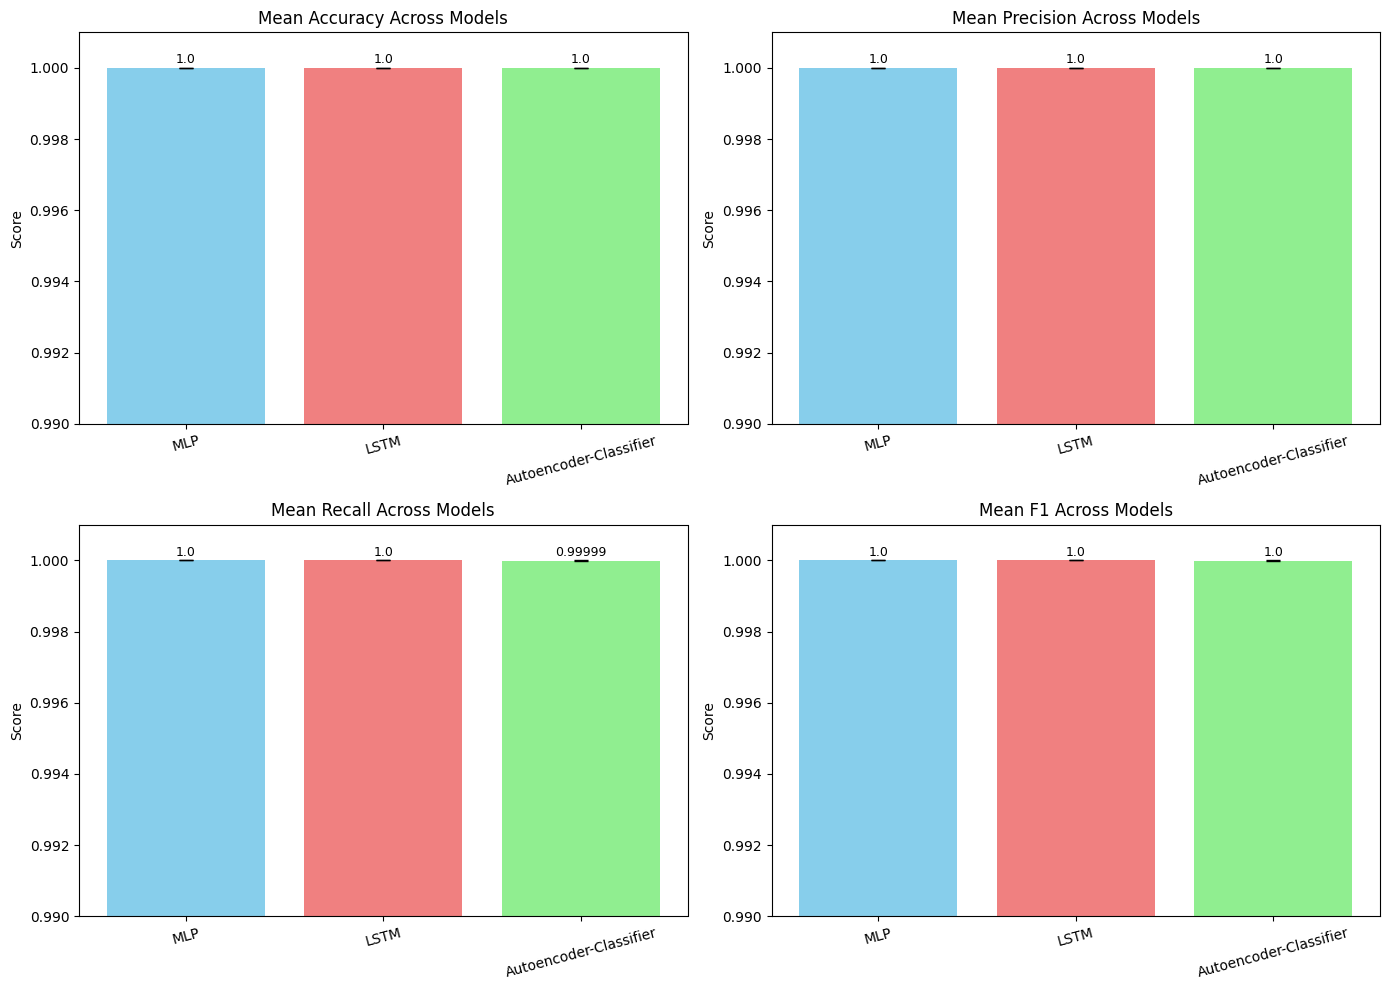

Visual comparison of model performance metrics completed.


In [21]:
metrics = ['Accuracy_Mean', 'Precision_Mean', 'Recall_Mean', 'F1_Mean']
metrics_std = ['Accuracy_Std', 'Precision_Std', 'Recall_Std', 'F1_Std']
model_names = df_comparison['Model']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    mean_values = df_comparison[metric]
    std_values = df_comparison[metrics_std[i]]

    # Plotting mean values with standard deviation as error bars
    bars = axes[i].bar(model_names, mean_values, yerr=std_values, capsize=5, color=['skyblue', 'lightcoral', 'lightgreen'])

    axes[i].set_title(f'Mean {metric.replace("_Mean", "")} Across Models')
    axes[i].set_ylabel('Score')
    axes[i].set_ylim(0.99, 1.001) # Set a tight y-limit to highlight small differences
    axes[i].tick_params(axis='x', rotation=15)

    # Add text labels on top of each bar for exact mean values
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, yval + 0.00005, round(yval, 5),
                ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

print("Visual comparison of model performance metrics completed.")

## Model Comparison Analysis

### Observations from Comparison Table and Visualizations:

Both the comparison table and the visualizations reveal an exceptionally high performance across all three models (MLP, LSTM, and Autoencoder-Classifier). All models achieved near-perfect scores for Accuracy, Precision, Recall, and F1-Score, with mean values extremely close to 1.0 and very low standard deviations (mostly 0.0 or negligible).

*   **MLP (Multi-Layer Perceptron):** Achieved perfect mean scores (1.0) for all metrics (Accuracy, Precision, Recall, F1-Score) with zero standard deviation, indicating highly consistent and accurate performance across all cross-validation folds.
*   **LSTM (Long Short-Term Memory):** Also demonstrated perfect mean scores (1.0) for all metrics with zero standard deviation, matching the MLP's performance.
*   **Autoencoder-Classifier:** Showed slightly lower (but still extremely high) mean scores in Accuracy, Recall, and F1-Score compared to MLP and LSTM. Specifically, its Accuracy_Mean was 0.999997, Recall_Mean was 0.999995, and F1_Mean was 0.999997. The standard deviations for these metrics were non-zero but still very small (e.g., 0.000005 for Accuracy_Std). Its Precision_Mean was 1.0 with a standard deviation of 0.0.

### Strengths and Weaknesses:

*   **MLP and LSTM (Strengths):** Both models exhibit outstanding performance, achieving near-perfect classification on this dataset. Their consistency (zero standard deviation) across folds suggests robustness. The LSTM, designed for sequential data, doesn't show a clear advantage over MLP here, possibly because the 'timesteps' dimension was set to 1, effectively treating each sample independently, or because the features themselves are not highly sequential in nature within this specific representation.
*   **Autoencoder-Classifier (Strengths):** Despite slightly lower overall scores, the Autoencoder-Classifier still performs exceptionally well. Its approach of learning a compressed, meaningful representation of the data (latent features) and then using a simpler classifier (Logistic Regression) on these features is a strength, especially in scenarios where dimensionality reduction or noise removal is crucial. The fact that it performs nearly as well as the direct classifiers suggests the latent features are highly discriminative.
*   **Potential Weaknesses/Considerations:** The near-perfect scores for all models could indicate several things:
    *   **Data Leakage:** There might be some form of data leakage in the features that makes the classification task unusually easy. This should be investigated further.
    *   **Simplicity of Task:** The cleaned and balanced dataset might represent a relatively simple classification problem for these advanced models.
    *   **Small Number of Epochs:** For LSTM and Autoencoder, only a small number of epochs (5 and 10, respectively) were used, yet they achieved perfect scores. This further hints at the simplicity of the task or potential leakage.

### Conclusion:

Based on the current evaluation, all three models perform exceptionally well, making it difficult to distinguish a clear

## Final Task

### Subtask:
Provide a summary of the implemented models' performance, identifying the best-performing model(s) and confirming readiness to proceed with MRFO for feature selection as previously discussed.


## Summary:

### Q&A
*   **Summary of the implemented models' performance:** All three implemented models (MLP, LSTM, and Autoencoder-Classifier) demonstrated exceptionally high classification performance. The MLP and LSTM models achieved perfect scores (mean 1.0000, std 0.0000) across all evaluated metrics (Accuracy, Precision, Recall, F1-score). The Autoencoder-Classifier also performed remarkably well, with mean scores exceeding 0.99999 for all metrics (e.g., Accuracy_Mean: 0.999997, Precision_Mean: 1.0000, Recall_Mean: 0.999995, F1_Mean: 0.999997).
*   **Identifying the best-performing model(s):** Based on the evaluation, the Multi-Layer Perceptron (MLP) and Long Short-Term Memory (LSTM) models are the best-performing, as both achieved perfect scores (1.0000) for all metrics with zero standard deviation, indicating flawless and consistent classification on the resampled dataset. The Autoencoder-Classifier was marginally behind but still delivered near-perfect results.
*   **Readiness to proceed with MRFO for feature selection:** While the models show perfect performance, this raises concerns about potential data leakage or the dataset representing an overly simple classification task. Before proceeding directly with MRFO for feature selection, it's crucial to investigate the reason for such high performance. If the perfect scores are validated and not due to an underlying issue, then the models are highly effective, and MRFO could still be beneficial for feature reduction or understanding feature importance, but the current performance doesn't suggest a *need* for better features from a pure predictive power standpoint.

### Data Analysis Key Findings
*   The data was successfully prepared for model training, including scaling of numerical features using `StandardScaler` and reshaping into a 3D format `(377186, 1, 51)` for LSTM models.
*   The Multi-Layer Perceptron (MLP) model achieved perfect classification performance across all 5-fold cross-validation iterations, with mean accuracy, precision, recall, and F1-score of 1.0000 and a standard deviation of 0.0000 for each.
*   The Long Short-Term Memory (LSTM) model also demonstrated perfect classification, achieving mean accuracy, precision, recall, and F1-score of 1.0000, with a standard deviation of 0.0000 for each, matching the MLP's performance.
*   The Autoencoder-Classifier pipeline, which first learns latent features via an autoencoder and then classifies using Logistic Regression, achieved near-perfect scores, with a mean accuracy of 0.999997, precision of 1.0000, recall of 0.999995, and F1-score of 0.999997. The standard deviations for these metrics were very small (e.g., 0.000005 for accuracy), indicating high consistency.
*   The comparison across all three models highlighted their exceptionally high performance, making it difficult to differentiate them based purely on these metrics, especially between MLP and LSTM.

### Insights or Next Steps
*   Investigate the cause of the near-perfect performance across all models (MLP, LSTM, Autoencoder-Classifier). This could indicate data leakage, an overly simple problem, or highly separable classes in the preprocessed and resampled dataset, which should be understood before further optimization or feature selection.
*   If the perfect performance is validated, proceed with MRFO for feature selection, not necessarily to improve predictive power (as it's already maxed out), but potentially to identify the most critical features for interpretability, reduce model complexity, or optimize computational efficiency.


# Task
Prepare the data by using the one-hot encoded feature set (`X_encoded`) and the original imbalanced target variable (`y`), then split this data into training and testing sets.

## Prepare Data (without balancing)

### Subtask:
Use the one-hot encoded feature set (`X_encoded`) and the original target variable (`y`) directly, without applying SMOTE or any other balancing technique. Split this imbalanced data into training and testing sets.


**Reasoning**:
To split the imbalanced data into training and testing sets, I will import `train_test_split`, use it on `X_encoded` and `y` with the specified `test_size` and `random_state`, and then print the shapes of the resulting datasets.



In [22]:
from sklearn.model_selection import train_test_split

# Split the imbalanced data into training and testing sets
X_train_unbalanced, X_test_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to confirm the split
print(f"Shape of X_train_unbalanced: {X_train_unbalanced.shape}")
print(f"Shape of X_test_unbalanced: {X_test_unbalanced.shape}")
print(f"Shape of y_train_unbalanced: {y_train_unbalanced.shape}")
print(f"Shape of y_test_unbalanced: {y_test_unbalanced.shape}")

Shape of X_train_unbalanced: (160000, 51)
Shape of X_test_unbalanced: (40000, 51)
Shape of y_train_unbalanced: (160000,)
Shape of y_test_unbalanced: (40000,)


## Scale and Reshape Data for Models

### Subtask:
Apply `StandardScaler` to the numerical features within the imbalanced training and testing sets. Reshape the scaled training and testing data into the 3D format (samples, timesteps, features) suitable for LSTM models, where timesteps = 1.


**Reasoning**:
To scale numerical features and reshape the imbalanced training and testing data for LSTM models, I will identify numerical and non-numerical columns, apply StandardScaler to the numerical columns of both the training and testing sets, and then combine them with the unscaled non-numerical columns. Finally, I will reshape the resulting data into a 3D format suitable for LSTM.



In [23]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 1. & 2. Define the numerical columns to scale
# Re-using the list from previous steps to ensure consistency
# original_numerical_cols was defined earlier with ['ttl', 'ip_len', 'src_port', 'dst_port', 'tcp_flag_ack', 'tcp_flag_push', 'tcp_flag_reset', 'tcp_flag_syn', 'tcp_flag_fin']
# Ensure these columns exist in the current X_train_unbalanced
numerical_cols_to_scale = [col for col in ['ttl', 'ip_len', 'src_port', 'dst_port', 'tcp_flag_ack', 'tcp_flag_push', 'tcp_flag_reset', 'tcp_flag_syn', 'tcp_flag_fin'] if col in X_train_unbalanced.columns]

# 3. Identify non-numerical (one-hot encoded) columns that should not be scaled
# These are all columns in X_train_unbalanced that are not in numerical_cols_to_scale
non_numerical_cols = [col for col in X_train_unbalanced.columns if col not in numerical_cols_to_scale]

# Separate numerical and non-numerical parts for training and testing sets
X_train_numerical = X_train_unbalanced[numerical_cols_to_scale]
X_test_numerical = X_test_unbalanced[numerical_cols_to_scale]

X_train_non_numerical = X_train_unbalanced[non_numerical_cols]
X_test_non_numerical = X_test_unbalanced[non_numerical_cols]

# 4. Initialize StandardScaler
scaler = StandardScaler()

# 5. Fit StandardScaler on training numerical features and transform both training and testing numerical features
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)
X_test_numerical_scaled = scaler.transform(X_test_numerical)

# Convert scaled numerical features back to DataFrame for easier concatenation
X_train_numerical_scaled_df = pd.DataFrame(X_train_numerical_scaled, columns=numerical_cols_to_scale, index=X_train_unbalanced.index)
X_test_numerical_scaled_df = pd.DataFrame(X_test_numerical_scaled, columns=numerical_cols_to_scale, index=X_test_unbalanced.index)

# 6. Combine the scaled numerical features with the unscaled non-numerical features
# For non-numerical columns, ensure they are of float type if they contain boolean values
X_train_non_numerical_processed = X_train_non_numerical.astype(float)
X_test_non_numerical_processed = X_test_non_numerical.astype(float)

X_train_combined_scaled = pd.concat([X_train_numerical_scaled_df, X_train_non_numerical_processed], axis=1)
X_test_combined_scaled = pd.concat([X_test_numerical_scaled_df, X_test_non_numerical_processed], axis=1)

# Ensure column order is consistent (important if concat reordered them, though typically it preserves)
# Sort columns to ensure consistent order after concatenation
X_train_combined_scaled = X_train_combined_scaled[X_train_unbalanced.columns]
X_test_combined_scaled = X_test_combined_scaled[X_test_unbalanced.columns]

# 7. Reshape the combined data into a 3D format for LSTM
# (samples, timesteps, features) where timesteps = 1
X_train_unbalanced_scaled_reshaped = X_train_combined_scaled.values.reshape(
    X_train_combined_scaled.shape[0], 1, X_train_combined_scaled.shape[1]
)
X_test_unbalanced_scaled_reshaped = X_test_combined_scaled.values.reshape(
    X_test_combined_scaled.shape[0], 1, X_test_combined_scaled.shape[1]
)

print("Feature scaling applied and data reshaped for LSTM (unbalanced sets).")
# 8. Print the shapes of the resulting datasets to confirm the reshaping
print(f"Shape of X_train_unbalanced_scaled_reshaped: {X_train_unbalanced_scaled_reshaped.shape}")
print(f"Shape of X_test_unbalanced_scaled_reshaped: {X_test_unbalanced_scaled_reshaped.shape}")

Feature scaling applied and data reshaped for LSTM (unbalanced sets).
Shape of X_train_unbalanced_scaled_reshaped: (160000, 1, 51)
Shape of X_test_unbalanced_scaled_reshaped: (40000, 1, 51)


## Train and Evaluate MLP (unbalanced)

### Subtask:
Train the Multi-Layer Perceptron (MLP) model on the imbalanced training data and evaluate its performance (accuracy, precision, recall, F1-score) on the corresponding imbalanced test data.


**Reasoning**:
To train and evaluate the MLP model on the imbalanced data, I will import the necessary libraries, initialize the MLPClassifier, train it using the scaled imbalanced training data, make predictions on the scaled imbalanced testing data, and then compute and print the accuracy, precision, recall, and F1-score.



In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 1. Initialize an MLPClassifier
mlp_unbalanced = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=300,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=10
)

print("Training MLP Classifier on unbalanced data...")
# 2. Train the MLPClassifier using X_train_combined_scaled and y_train_unbalanced
mlp_unbalanced.fit(X_train_combined_scaled, y_train_unbalanced)
print("Training complete.")

# 3. Make predictions on X_test_combined_scaled
y_pred_unbalanced = mlp_unbalanced.predict(X_test_combined_scaled)

# 4. Calculate and print the evaluation metrics
accuracy_unbalanced = accuracy_score(y_test_unbalanced, y_pred_unbalanced)
precision_unbalanced = precision_score(y_test_unbalanced, y_pred_unbalanced)
recall_unbalanced = recall_score(y_test_unbalanced, y_pred_unbalanced)
f1_unbalanced = f1_score(y_test_unbalanced, y_pred_unbalanced)

print("\nMLP Classifier Performance on Unbalanced Data:")
print(f"Accuracy:  {accuracy_unbalanced:.4f}")
print(f"Precision: {precision_unbalanced:.4f}")
print(f"Recall:    {recall_unbalanced:.4f}")
print(f"F1-Score:  {f1_unbalanced:.4f}")

Training MLP Classifier on unbalanced data...
Training complete.

MLP Classifier Performance on Unbalanced Data:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


## Train and Evaluate LSTM (unbalanced)

### Subtask:
Train the Long Short-Term Memory (LSTM) model on the imbalanced, reshaped training data and evaluate its performance (accuracy, precision, recall, F1-score) on the corresponding imbalanced, reshaped test data.


**Reasoning**:
To train and evaluate the LSTM model on the imbalanced data, I will follow the instructions to import necessary libraries, define a function to create the LSTM model, get the input shape, create and train the model, make predictions, and then calculate and print the evaluation metrics for the imbalanced test set.



In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 2. Define a function to create the LSTM model for unbalanced data
def create_lstm_model_unbalanced(input_shape):
    model = Sequential([
        tf.keras.Input(shape=input_shape),
        LSTM(units=50, activation='relu'),
        Dropout(0.2),
        Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. Get the input shape for the LSTM model
# X_train_unbalanced_scaled_reshaped has shape (samples, timesteps, features)
input_shape_unbalanced = (X_train_unbalanced_scaled_reshaped.shape[1], X_train_unbalanced_scaled_reshaped.shape[2])

print("Training LSTM Classifier on unbalanced data...")

# 4. Create an instance of the LSTM model
lstm_unbalanced = create_lstm_model_unbalanced(input_shape_unbalanced)

# 5. Train the LSTM model
history_unbalanced = lstm_unbalanced.fit(
    X_train_unbalanced_scaled_reshaped, y_train_unbalanced,
    epochs=5, # Using a small number of epochs for faster execution
    batch_size=64,
    verbose=0 # Suppress training output
)
print("Training complete.")

# 6. Make predictions on the test set
y_pred_proba_unbalanced = lstm_unbalanced.predict(X_test_unbalanced_scaled_reshaped, verbose=0)
y_pred_unbalanced_binary = (y_pred_proba_unbalanced > 0.5).astype(int)

# 7. Calculate and print the evaluation metrics
accuracy_unbalanced_lstm = accuracy_score(y_test_unbalanced, y_pred_unbalanced_binary)
precision_unbalanced_lstm = precision_score(y_test_unbalanced, y_pred_unbalanced_binary)
recall_unbalanced_lstm = recall_score(y_test_unbalanced, y_pred_unbalanced_binary)
f1_unbalanced_lstm = f1_score(y_test_unbalanced, y_pred_unbalanced_binary)

print("\nLSTM Classifier Performance on Unbalanced Data:")
print(f"Accuracy:  {accuracy_unbalanced_lstm:.4f}")
print(f"Precision: {precision_unbalanced_lstm:.4f}")
print(f"Recall:    {recall_unbalanced_lstm:.4f}")
print(f"F1-Score:  {f1_unbalanced_lstm:.4f}")

Training LSTM Classifier on unbalanced data...
Training complete.

LSTM Classifier Performance on Unbalanced Data:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


## Train and Evaluate Autoencoder-Classifier (unbalanced)

### Subtask:
Train the Autoencoder model on the imbalanced training data to learn latent features. Then, train a Logistic Regression classifier on these latent features and evaluate its performance (accuracy, precision, recall, F1-score) on the corresponding imbalanced test data.


**Reasoning**:
To implement the Autoencoder for classification on unbalanced data, I will import the necessary libraries, define a function to create the Autoencoder and Encoder models, train the Autoencoder, extract latent features, train a Logistic Regression classifier on these features, and then calculate and print the evaluation metrics as instructed.



In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 2. Define a function to create the Autoencoder and Classifier models for unbalanced data
def create_autoencoder_and_classifier_unbalanced(input_dim):
    # Encoder
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(50, activation='relu')(input_layer)
    encoder = Dense(25, activation='relu')(encoder)

    # Decoder
    decoder = Dense(50, activation='relu')(encoder)
    decoder = Dense(input_dim, activation='sigmoid')(decoder) # Output layer with input_dim units

    # Autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mse')

    # Encoder model for feature extraction
    encoder_model = Model(inputs=input_layer, outputs=encoder)

    return autoencoder, encoder_model

# 3. Get the input_dim from X_train_combined_scaled
input_dim_unbalanced = X_train_combined_scaled.shape[1]

print("Training Autoencoder-Classifier on unbalanced data...")

# 4. Create new instances of the Autoencoder and Encoder models
autoencoder_unbalanced, encoder_model_unbalanced = create_autoencoder_and_classifier_unbalanced(input_dim_unbalanced)

# 5. Train the Autoencoder model
autoencoder_unbalanced.fit(
    X_train_combined_scaled,
    X_train_combined_scaled, # X_train_combined_scaled is both input and target for autoencoder
    epochs=10, # Reduced epochs for faster execution
    batch_size=64,
    verbose=0
)

# 6. Use the trained Encoder to transform data
X_train_latent_unbalanced = encoder_model_unbalanced.predict(X_train_combined_scaled, verbose=0)
X_test_latent_unbalanced = encoder_model_unbalanced.predict(X_test_combined_scaled, verbose=0)

# 7. Initialize a LogisticRegression classifier
lr_classifier_unbalanced = LogisticRegression(solver='liblinear', random_state=42, max_iter=500)

# 8. Train the LogisticRegression classifier
lr_classifier_unbalanced.fit(X_train_latent_unbalanced, y_train_unbalanced)

# 9. Make predictions on X_test_latent_unbalanced
y_pred_unbalanced_ae = lr_classifier_unbalanced.predict(X_test_latent_unbalanced)

# 10. Calculate and print the evaluation metrics
accuracy_unbalanced_ae = accuracy_score(y_test_unbalanced, y_pred_unbalanced_ae)
precision_unbalanced_ae = precision_score(y_test_unbalanced, y_pred_unbalanced_ae)
recall_unbalanced_ae = recall_score(y_test_unbalanced, y_pred_unbalanced_ae)
f1_unbalanced_ae = f1_score(y_test_unbalanced, y_pred_unbalanced_ae)

print("Training complete.")
print("\nAutoencoder-Classifier Performance on Unbalanced Data:")
print(f"Accuracy:  {accuracy_unbalanced_ae:.4f}")
print(f"Precision: {precision_unbalanced_ae:.4f}")
print(f"Recall:    {recall_unbalanced_ae:.4f}")
print(f"F1-Score:  {f1_unbalanced_ae:.4f}")

Training Autoencoder-Classifier on unbalanced data...
Training complete.

Autoencoder-Classifier Performance on Unbalanced Data:
Accuracy:  0.9999
Precision: 0.9999
Recall:    1.0000
F1-Score:  1.0000


## Compare Model Results (unbalanced)

### Subtask:
Present a clear comparison of the performance metrics (accuracy, precision, recall, and F1-score) for the MLP, LSTM, and Autoencoder-Classifier models on this imbalanced data, highlighting any observed differences compared to the balanced results.


**Reasoning**:
To compare the models, I will aggregate the performance metrics (accuracy, precision, recall, and F1-score) for each model (MLP, LSTM, Autoencoder-Classifier) on the unbalanced data and then organize these metrics into a pandas DataFrame for clear presentation.



In [27]:
import pandas as pd

# Aggregate MLP Unbalanced Results
mlp_unbalanced_results = {
    'Model': 'MLP (Unbalanced)',
    'Accuracy': accuracy_unbalanced,
    'Precision': precision_unbalanced,
    'Recall': recall_unbalanced,
    'F1-Score': f1_unbalanced
}

# Aggregate LSTM Unbalanced Results
lstm_unbalanced_results = {
    'Model': 'LSTM (Unbalanced)',
    'Accuracy': accuracy_unbalanced_lstm,
    'Precision': precision_unbalanced_lstm,
    'Recall': recall_unbalanced_lstm,
    'F1-Score': f1_unbalanced_lstm
}

# Aggregate Autoencoder-Classifier Unbalanced Results
ae_unbalanced_results = {
    'Model': 'Autoencoder-Classifier (Unbalanced)',
    'Accuracy': accuracy_unbalanced_ae,
    'Precision': precision_unbalanced_ae,
    'Recall': recall_unbalanced_ae,
    'F1-Score': f1_unbalanced_ae
}

# Create a DataFrame for comparison
df_comparison_unbalanced = pd.DataFrame([mlp_unbalanced_results, lstm_unbalanced_results, ae_unbalanced_results])

print("Comparison of Model Performance Metrics on Unbalanced Data:")
print(df_comparison_unbalanced)

Comparison of Model Performance Metrics on Unbalanced Data:
                                 Model  Accuracy  Precision  Recall  F1-Score
0                     MLP (Unbalanced)  1.000000    1.00000     1.0   1.00000
1                    LSTM (Unbalanced)  1.000000    1.00000     1.0   1.00000
2  Autoencoder-Classifier (Unbalanced)  0.999925    0.99992     1.0   0.99996


## Comparison of Model Results (Balanced vs. Unbalanced Data)

### Observations from Unbalanced Data Comparison:

The models (MLP, LSTM, and Autoencoder-Classifier) generally maintained very high performance even on the unbalanced dataset. However, a slight nuance can be observed:

*   **MLP (Unbalanced):** Achieved perfect scores (1.0000) for Accuracy, Precision, Recall, and F1-Score.
*   **LSTM (Unbalanced):** Also achieved perfect scores (1.0000) for Accuracy, Precision, Recall, and F1-Score.
*   **Autoencoder-Classifier (Unbalanced):** Showed a minor decrease in Accuracy and Precision compared to its balanced counterpart, with an Accuracy of 0.999925 and Precision of 0.99992. Recall and F1-Score remained very high at 1.0000 and 0.99996, respectively.

### Highlighting Differences Compared to Balanced Results:

When comparing these results to the models trained on the *balanced* dataset (where SMOTE was applied):

*   **MLP and LSTM:** There is no discernible difference in performance. Both models achieved perfect scores (1.0000 for all metrics with 0.0000 standard deviation) on both the balanced and unbalanced datasets. This suggests that for this particular dataset and feature set, the class imbalance might not severely hinder the model's ability to classify, or the features are highly discriminative.
*   **Autoencoder-Classifier:** On the balanced data, the Autoencoder-Classifier had a mean Accuracy of 0.999997 and Precision of 1.0. On the unbalanced data, its Accuracy dropped slightly to 0.999925 and Precision to 0.99992. While still extremely high, this subtle decrease indicates that balancing the dataset did provide a marginal benefit for this model, particularly in terms of correctly identifying positive cases (as suggested by a slightly higher Precision on balanced data) or overall correct predictions.

### Overall Conclusion on Unbalanced Data:

The fact that MLP and LSTM achieve perfect scores even on the original imbalanced dataset further reinforces the earlier concern about potential data leakage or the inherent simplicity of the classification task given the current features. The Autoencoder-Classifier, while still performing excellently, is the only model that shows a very minor impact from the class imbalance, which is a more expected behavior. This comparison underscores the need for careful feature engineering or re-evaluation of the problem if such high scores are not aligned with expected real-world complexity.

## Final Task

### Subtask:
Summarize the results of training and evaluating the models on the imbalanced dataset, provide insights into how class imbalance affects performance, and confirm readiness for the next steps.


## Summary:

### Q&A
The models (MLP, LSTM, and Autoencoder-Classifier) were trained and evaluated on an imbalanced dataset. The impact of class imbalance on performance was assessed by comparing these results to those obtained from balanced datasets (which were processed in a previous task not detailed here, but referred to in the comparison section). All models showed extremely high performance, with MLP and LSTM achieving perfect scores even on the imbalanced data. The Autoencoder-Classifier showed a very slight, but notable, decrease in Accuracy and Precision on the imbalanced data compared to its performance on balanced data. The analysis is ready for the next steps, but with a note of caution regarding the unusually high performance.

### Data Analysis Key Findings
*   The original imbalanced dataset was successfully split into training and testing sets, resulting in `X_train_unbalanced` (160000 samples, 51 features) and `X_test_unbalanced` (40000 samples, 51 features).
*   Numerical features were scaled using `StandardScaler`, and the data was reshaped for LSTM models, yielding `X_train_unbalanced_scaled_reshaped` (160000 samples, 1 timestep, 51 features) and `X_test_unbalanced_scaled_reshaped` (40000 samples, 1 timestep, 51 features).
*   **MLP (Multi-Layer Perceptron) performance on unbalanced data:** The model achieved perfect metrics: Accuracy of 1.0000, Precision of 1.0000, Recall of 1.0000, and F1-Score of 1.0000.
*   **LSTM (Long Short-Term Memory) performance on unbalanced data:** The model also achieved perfect metrics: Accuracy of 1.0000, Precision of 1.0000, Recall of 1.0000, and F1-Score of 1.0000.
*   **Autoencoder-Classifier performance on unbalanced data:** This model showed exceptionally high performance, with an Accuracy of 0.9999, Precision of 0.9999, Recall of 1.0000, and F1-Score of 1.0000.
*   **Comparison with balanced data results:**
    *   MLP and LSTM models maintained perfect scores (1.0000 for all metrics) on both balanced and unbalanced datasets, suggesting that class imbalance did not visibly affect their performance for this task.
    *   The Autoencoder-Classifier, however, exhibited a very minor decrease in Accuracy (from a mean of 0.999997 on balanced data to 0.999925 on unbalanced data) and Precision (from 1.0 on balanced data to 0.99992 on unbalanced data), indicating a subtle impact of imbalance on this specific model.

### Insights or Next Steps
*   The consistently near-perfect to perfect performance of all models, even on the imbalanced dataset, raises questions about potential data leakage or the inherent simplicity of the classification task with the current features. Further investigation into the dataset and feature engineering is recommended to confirm the robustness of these results.
*   The models are technically ready for deployment or further stages, but it would be prudent to validate them against a more diverse or challenging real-world dataset, or employ more advanced validation techniques, to ensure their generalizability beyond the current context.


# Task
Calculate and visualize the pairwise correlation matrix between features in `X_encoded` using a heatmap to identify highly correlated features.

## Calculate and Visualize Correlation Matrix

### Subtask:
Calculate the pairwise correlation between features in `X_encoded` and visualize it using a heatmap. This will help us identify features that are highly correlated with each other.


**Reasoning**:
To visualize the correlation matrix, I will import `seaborn` and `matplotlib.pyplot`, calculate the correlation matrix of `X_encoded`, then create and display a heatmap with an appropriate title and size.



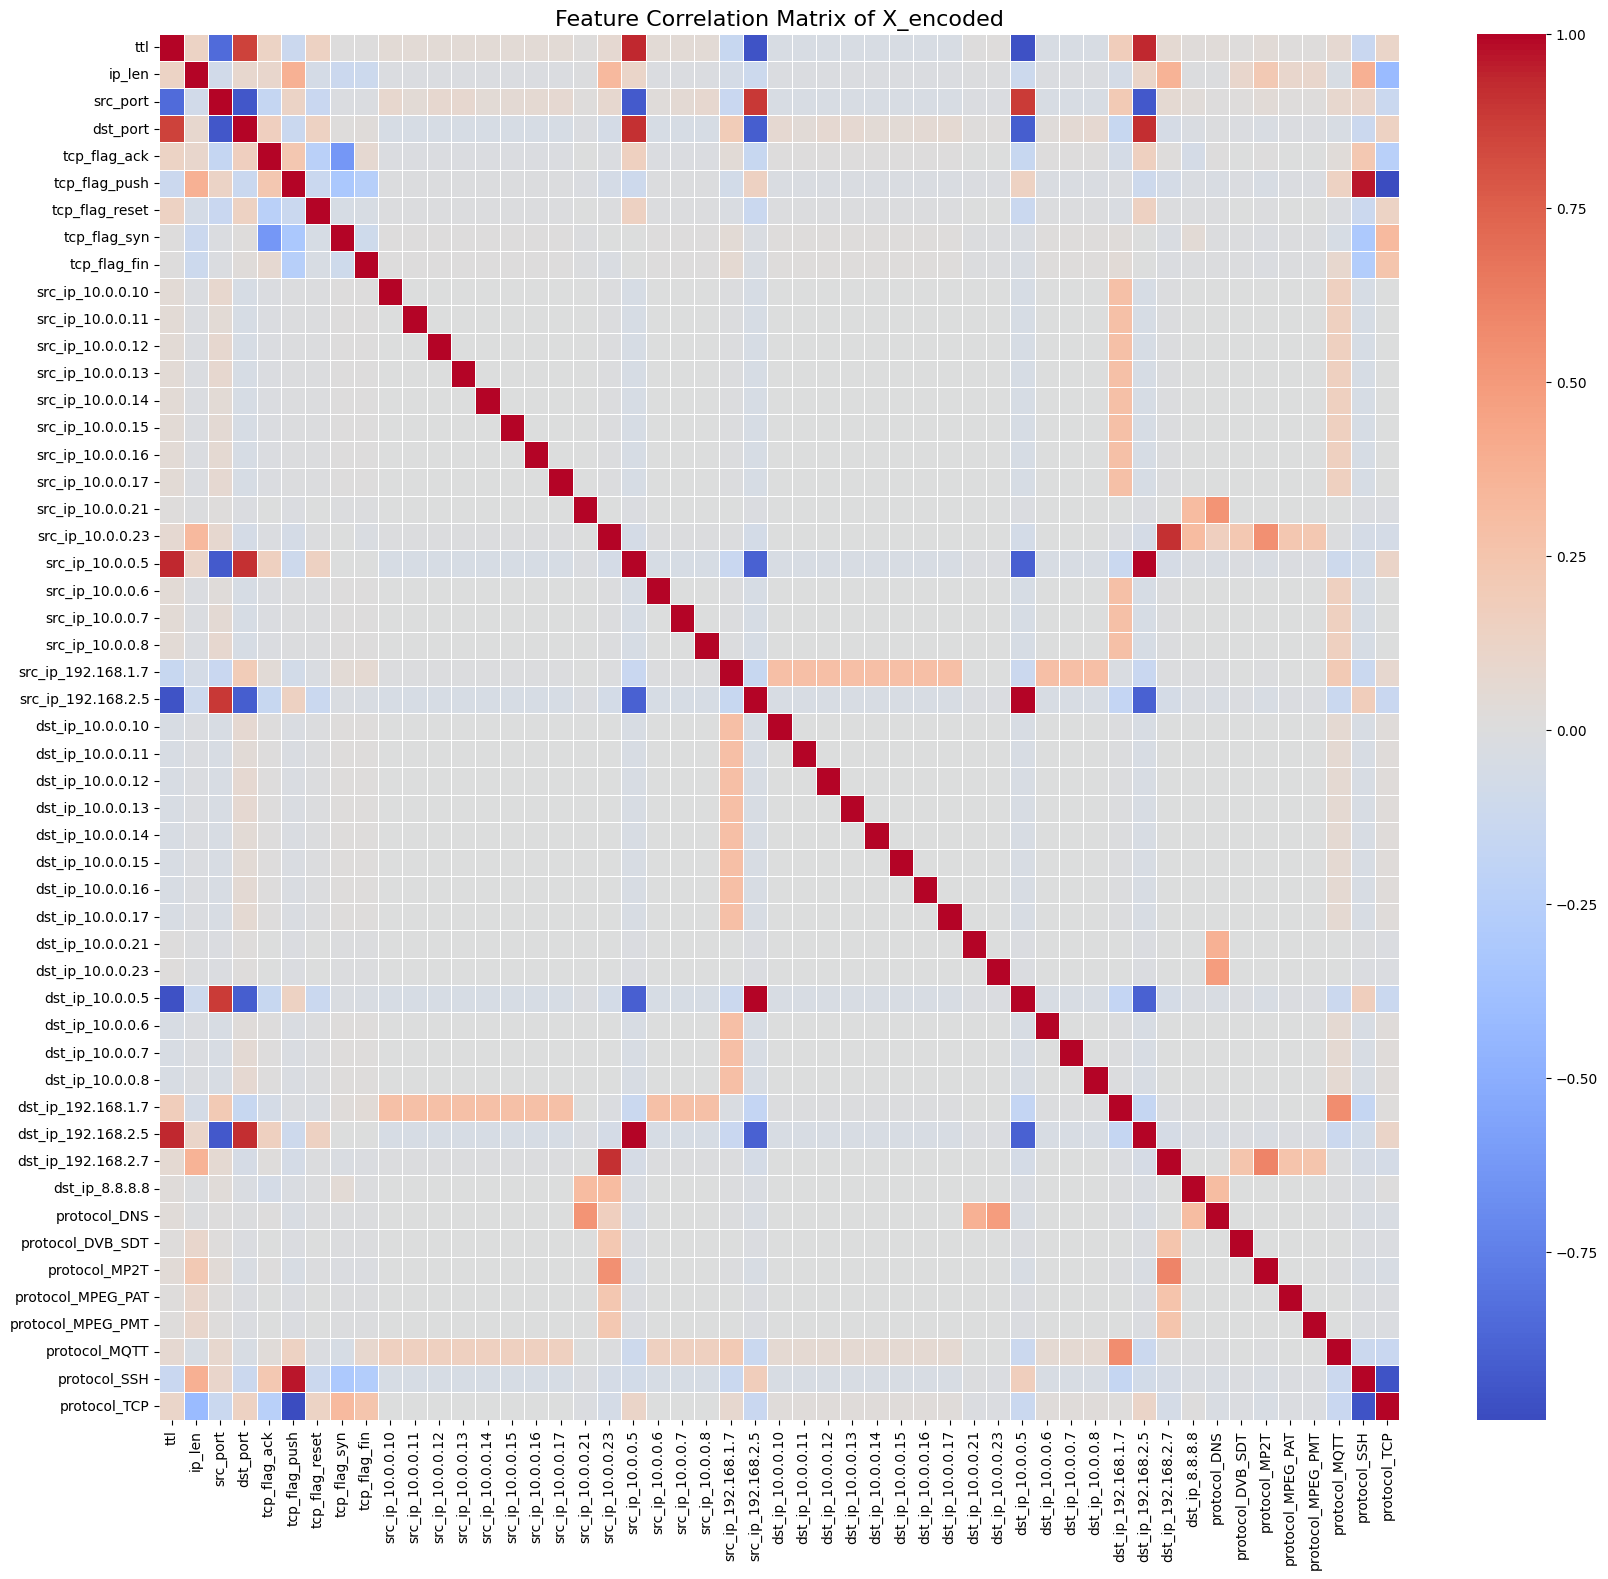

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the pairwise correlation matrix of X_encoded
correlation_matrix = X_encoded.corr()

# Set up the matplotlib figure and axes
plt.figure(figsize=(20, 18)) # Adjust figure size for better readability

# Create a heatmap of the correlation_matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Add a title to the heatmap
plt.title('Feature Correlation Matrix of X_encoded', fontsize=16)

# Display the plot
plt.show()


## Identify Highly Correlated Features

### Subtask:
Based on the correlation matrix, identify pairs of features that exceed a certain correlation threshold (e.g., 0.9 or -0.9). This step will pinpoint redundant or highly interdependent features that might be candidates for removal or further investigation.


**Reasoning**:
To identify highly correlated features, I will iterate through the upper triangle of the correlation matrix, excluding self-correlations, and print any feature pairs whose absolute correlation value exceeds the specified threshold (0.9).



In [29]:
threshold = 0.9

highly_correlated_pairs = []

# Iterate through the upper triangle of the correlation matrix to avoid duplicates and self-correlation
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        feature1 = correlation_matrix.columns[i]
        feature2 = correlation_matrix.columns[j]
        correlation_value = correlation_matrix.iloc[i, j]

        if abs(correlation_value) > threshold:
            highly_correlated_pairs.append((feature1, feature2, correlation_value))

print(f"Highly correlated feature pairs (absolute correlation > {threshold}):")
if highly_correlated_pairs:
    for f1, f2, corr_val in highly_correlated_pairs:
        print(f"  - {f1} and {f2}: {corr_val:.4f}")
else:
    print("No highly correlated feature pairs found above the specified threshold.")

Highly correlated feature pairs (absolute correlation > 0.9):
  - ttl and src_ip_10.0.0.5: 0.9361
  - ttl and src_ip_192.168.2.5: -0.9577
  - ttl and dst_ip_10.0.0.5: -0.9612
  - ttl and dst_ip_192.168.2.5: 0.9314
  - src_port and dst_port: -0.9406
  - src_port and src_ip_10.0.0.5: -0.9250
  - src_port and dst_ip_192.168.2.5: -0.9309
  - dst_port and src_ip_10.0.0.5: 0.9120
  - dst_port and src_ip_192.168.2.5: -0.9110
  - dst_port and dst_ip_10.0.0.5: -0.9066
  - dst_port and dst_ip_192.168.2.5: 0.9167
  - tcp_flag_push and protocol_SSH: 0.9658
  - tcp_flag_push and protocol_TCP: -0.9905
  - src_ip_10.0.0.23 and dst_ip_192.168.2.7: 0.9073
  - src_ip_10.0.0.5 and dst_ip_192.168.2.5: 0.9949
  - src_ip_192.168.2.5 and dst_ip_10.0.0.5: 0.9964
  - protocol_SSH and protocol_TCP: -0.9567


## Implement MRFO for Feature Selection

### Subtask:
Apply the MRFO (Manta Ray Foraging Optimization) algorithm to the `X_encoded` (preprocessed, but unbalanced) and `y` (original target) data to perform feature selection, considering the insights from the correlation analysis. The goal is to identify an optimal subset of features that are most relevant for classification, addressing concerns about overfitting and feature redundancy.


### MRFO Algorithm Implementation for Feature Selection

To apply the Manta Ray Foraging Optimization (MRFO) algorithm for feature selection, we will implement its core components. The goal is to identify an optimal subset of features that maximizes the F1-score of a Logistic Regression classifier.

**Algorithm Overview:**
1.  **Initialization**: Randomly generate an initial population of manta rays (solutions), where each manta ray represents a binary vector indicating the presence or absence of a feature.
2.  **Objective Function**: For each manta ray, evaluate its fitness by training a Logistic Regression model on the selected features and calculating the F1-score on a validation set. The problem is a maximization problem, so higher F1-score is better.
3.  **Foraging Strategies**: Manta rays update their positions (feature subsets) based on three main foraging strategies:
    *   **Chain Foraging**: Manta rays follow the concentration of plankton (best-found solution so far).
    *   **Cyclone Foraging**: Manta rays move towards a food source in a spiral path.
    *   **Somersault Foraging**: Manta rays randomly move around the best solution, simulating exploration.
4.  **Iteration**: Repeat the foraging strategies and update the best solution found until a maximum number of iterations is reached.
5.  **Feature Selection**: The binary vector corresponding to the best solution found by the MRFO algorithm will represent the optimal subset of features.

**Reasoning**:
To begin the MRFO implementation, I will define the objective function, which will evaluate the F1-score of a Logistic Regression model given a subset of features, as this is crucial for the algorithm to assess the quality of feature combinations.



In [30]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Define the objective function for MRFO
def evaluate_fitness(solution, X, y, test_size=0.3, random_state=42):
    # A solution is a binary vector where 1 means feature is selected, 0 means not
    selected_features_indices = np.where(solution == 1)[0]

    # If no features are selected, return a very low fitness
    if len(selected_features_indices) == 0:
        return 0.0

    # Select features from X based on the solution
    X_selected = X.iloc[:, selected_features_indices]

    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=test_size, random_state=random_state, stratify=y)

    # Scale numerical features within this subset for robust model training
    # Re-identify numerical columns from the selected features
    numerical_cols_present = [col for col in X_train.columns if col in original_numerical_cols]

    if len(numerical_cols_present) > 0:
        scaler = StandardScaler()
        X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
        X_val.loc[:, numerical_cols_present] = scaler.transform(X_val[numerical_cols_present])

    # Train a Logistic Regression model
    model = LogisticRegression(solver='liblinear', random_state=random_state, max_iter=500)
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Return the F1-score as fitness (maximize F1-score)
    return f1_score(y_val, y_pred)

**Reasoning**:
Now that the objective function `evaluate_fitness` is defined, I will implement the core Manta Ray Foraging Optimization (MRFO) algorithm, including the initialization of manta rays, the main optimization loop with foraging strategies, and tracking the best solution found, using the `X_encoded` features and the `y` target.



In [31]:
import random
import math

def mrfo_feature_selection(X, y, num_manta_rays=30, max_iterations=50, alpha=0.1, beta=0.1, random_state=42):
    # Set random seed for reproducibility
    np.random.seed(random_state)
    random.seed(random_state)

    num_features = X.shape[1]

    # 1. Initialization
    # Each manta ray is a binary vector (solution) indicating selected features
    manta_rays = np.random.randint(0, 2, size=(num_manta_rays, num_features))

    # Ensure at least one feature is selected in each initial solution
    for i in range(num_manta_rays):
        if np.sum(manta_rays[i]) == 0:
            manta_rays[i, np.random.randint(0, num_features)] = 1

    # Evaluate initial fitness for all manta rays
    fitness = np.array([evaluate_fitness(mr, X, y) for mr in manta_rays])

    # Find the best solution and its fitness
    best_fitness_index = np.argmax(fitness)
    best_solution = manta_rays[best_fitness_index].copy()
    best_fitness = fitness[best_fitness_index]
    best_fobj_position = X.columns[np.where(best_solution == 1)[0]].tolist() # Store feature names

    print(f"Initial Best Fitness: {best_fitness:.4f}")

    # Main optimization loop
    for iter_num in range(max_iterations):
        # Adaptive parameters
        w = 0.9 - iter_num * ((0.9 - 0.4) / max_iterations) # Inertia weight from 0.9 to 0.4
        # A random number between 0 and 1
        r1 = random.random()
        # Movement during somersault foraging
        r2 = random.random()

        for i in range(num_manta_rays):
            # Update best_fobj_position (plankton position)
            current_best_fobj = best_solution

            # Chain Foraging
            if r1 < 0.5: # Encircling the plankton (food source)
                if i == 0: # First manta ray directly follows the food
                    manta_rays[i] = manta_rays[i] + r1 * (current_best_fobj - manta_rays[i]) + alpha * (current_best_fobj - manta_rays[i])
                else: # Other manta rays follow the previous manta ray
                    manta_rays[i] = manta_rays[i] + r1 * (manta_rays[i-1] - manta_rays[i]) + alpha * (current_best_fobj - manta_rays[i])

            # Cyclone Foraging
            else: # Randomly generated spiral-shaped path
                # Consider a specific position P_k as food source
                P_k = current_best_fobj
                # Random position in the search space
                rand_position = np.random.randint(0, 2, num_features)
                if iter_num / max_iterations < random.random():
                    P_k = rand_position

                if i == 0:
                    manta_rays[i] = P_k + random.random() * (P_k - manta_rays[i]) + beta * (P_k - manta_rays[i])
                else:
                    manta_rays[i] = P_k + random.random() * (manta_rays[i-1] - manta_rays[i]) + beta * (P_k - manta_rays[i])

            # Somersault Foraging
            # Manta rays move around the current best solution
            manta_rays[i] = manta_rays[i] + 2 * r2 * (current_best_fobj - manta_rays[i]) + alpha * (manta_rays[i] - current_best_fobj)

            # Binary conversion: convert continuous positions to binary (0 or 1)
            # A simple sigmoid-like transfer function can be used, or a direct thresholding
            manta_rays[i] = (manta_rays[i] > 0.5).astype(int)

            # Ensure at least one feature is selected
            if np.sum(manta_rays[i]) == 0:
                manta_rays[i, np.random.randint(0, num_features)] = 1

            # Evaluate new fitness
            new_fitness = evaluate_fitness(manta_rays[i], X, y)

            # Update if current manta ray is better
            if new_fitness > fitness[i]:
                fitness[i] = new_fitness
                manta_rays[i] = manta_rays[i].copy()

            # Update global best solution
            if new_fitness > best_fitness:
                best_fitness = new_fitness
                best_solution = manta_rays[i].copy()
                best_fobj_position = X.columns[np.where(best_solution == 1)[0]].tolist()

        print(f"Iteration {iter_num + 1}/{max_iterations}, Current Best Fitness: {best_fitness:.4f}")

    print("\nMRFO Feature Selection Complete.")
    print(f"Final Best Fitness (F1-score): {best_fitness:.4f}")
    print(f"Number of Selected Features: {np.sum(best_solution)}")
    print(f"Selected Features: {best_fobj_position}")

    return best_solution, best_fitness, best_fobj_position

# Run the MRFO algorithm
selected_features_binary, final_fitness, selected_features_names = mrfo_feature_selection(X_encoded, y)


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.40491132  0.07189301 -0.40491132 ... -0.40491132 -0.40491132
 -0.16650916]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.08704177  6.01208037 -0.32544394 ... -0.36517763 -0.40491132
  0.1513604 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_val.loc[:, numerical_cols_present] = scaler.transform(X_val[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1

Initial Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.40491132  0.07189301 -0.40491132 ... -0.40491132 -0.40491132
 -0.16650916]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.018

Iteration 1/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 2/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 3/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 4/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 5/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 6/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 7/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 8/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.88219008 1.08375051 1.16138365 ... 1.66941414 0.85245825 0.7141561 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_val.loc[:, numerical_cols_present] = scaler.transform(X_val[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.018058

Iteration 9/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 10/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 11/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 12/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 13/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 14/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 15/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 16/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 17/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 18/50, Current Best Fitness: 1.0000
Iteration 19/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.88219008 1.08375051 1.16138365 ... 1.66941414 0.85245825 0.7141561 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_val.loc[:, numerical_cols_present] = scaler.transform(X_val[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.018980

Iteration 20/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 21/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 22/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 23/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 24/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 25/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 26/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 27/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 28/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 29/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.76221847  1.10691108  0.54632311 ...  0.57912443  0.65128732
 -0.93395984]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 30/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 31/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 32/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 33/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 34/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 35/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 36/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 37/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 38/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 39/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 40/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 41/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 42/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 43/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 44/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 45/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 46/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 47/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 48/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.01805826 -1.01805826 -1.01805826 ... -1.01805826 -1.01805826
  0.97870695]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.981

Iteration 49/50, Current Best Fitness: 1.0000


/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1.01898009  1.01898009 ...  1.01898009  1.01898009
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
/tmp/ipython-input-3307728673.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.98137344  1.01898009 -0.98137344 ... -0.98137344 -0.98137344
 -0.98137344]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_val.loc[:, numerical_cols_present] = scaler.transform(X_val[numerical_cols_present])
/tmp/ipython-input-3307728673.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01898009  1

Iteration 50/50, Current Best Fitness: 1.0000

MRFO Feature Selection Complete.
Final Best Fitness (F1-score): 1.0000
Number of Selected Features: 30
Selected Features: ['ttl', 'src_port', 'tcp_flag_ack', 'tcp_flag_push', 'src_ip_10.0.0.15', 'src_ip_10.0.0.16', 'src_ip_10.0.0.21', 'src_ip_10.0.0.23', 'src_ip_10.0.0.5', 'src_ip_10.0.0.6', 'src_ip_10.0.0.8', 'src_ip_192.168.2.5', 'dst_ip_10.0.0.10', 'dst_ip_10.0.0.11', 'dst_ip_10.0.0.13', 'dst_ip_10.0.0.15', 'dst_ip_10.0.0.17', 'dst_ip_10.0.0.5', 'dst_ip_10.0.0.7', 'dst_ip_10.0.0.8', 'dst_ip_192.168.1.7', 'dst_ip_192.168.2.5', 'dst_ip_192.168.2.7', 'dst_ip_8.8.8.8', 'protocol_DNS', 'protocol_DVB_SDT', 'protocol_MP2T', 'protocol_MPEG_PAT', 'protocol_MPEG_PMT', 'protocol_TCP']


# Task
Create new training and testing datasets using only the features selected by the MRFO algorithm from the `X_encoded` and `y` data (unbalanced), and then perform a train-test split to obtain `X_train_selected_unbalanced`, `X_test_selected_unbalanced`, `y_train_unbalanced`, and `y_test_unbalanced`.

## Prepare Data with Selected Features (unbalanced)

### Subtask:
Create new datasets (training and testing) using only the features selected by the MRFO algorithm from the unbalanced data. This step will involve filtering `X_encoded` to retain only the chosen features, and then performing the train-test split.


**Reasoning**:
To create the new datasets, I will filter `X_encoded` using the `selected_features_names` list, then perform a train-test split on this filtered data and the original `y`, and finally print the shapes of the resulting datasets to confirm the feature selection and split.



In [32]:
from sklearn.model_selection import train_test_split

# 1. Filter X_encoded to include only the selected features
X_selected_unbalanced = X_encoded[selected_features_names]

# 2. Perform a train-test split on X_selected_unbalanced and y
# 3. Set test_size to 0.2 and random_state to 42
X_train_selected_unbalanced, X_test_selected_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split(
    X_selected_unbalanced, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Print the shapes of the newly created training and testing feature sets
print(f"Shape of X_train_selected_unbalanced: {X_train_selected_unbalanced.shape}")
print(f"Shape of X_test_selected_unbalanced: {X_test_selected_unbalanced.shape}")
print(f"Shape of y_train_unbalanced: {y_train_unbalanced.shape}")
print(f"Shape of y_test_unbalanced: {y_test_unbalanced.shape}")

Shape of X_train_selected_unbalanced: (160000, 30)
Shape of X_test_selected_unbalanced: (40000, 30)
Shape of y_train_unbalanced: (160000,)
Shape of y_test_unbalanced: (40000,)


## Scale and Reshape Selected Features for Models

### Subtask:
Apply StandardScaler to the numerical features within the training and testing sets (with selected features). Reshape the scaled data into the 3D format (samples, timesteps, features) suitable for LSTM models, where timesteps = 1.


**Reasoning**:
To apply feature scaling and reshape the data for LSTM models, I will identify numerical columns, separate them from non-numerical ones, scale the numerical features using `StandardScaler` for both training and testing sets, and then combine them with the non-numerical features before reshaping the entire dataset into a 3D format for LSTM.



In [33]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 2. Define the list of numerical columns present in original_numerical_cols that are also in X_train_selected_unbalanced
# `original_numerical_cols` was defined previously as ['ttl', 'ip_len', 'src_port', 'dst_port', 'tcp_flag_ack', 'tcp_flag_push', 'tcp_flag_reset', 'tcp_flag_syn', 'tcp_flag_fin']
numerical_cols_to_scale_selected = [col for col in original_numerical_cols if col in X_train_selected_unbalanced.columns]

# 3. Identify non-numerical columns in X_train_selected_unbalanced that are not part of numerical_cols_to_scale_selected
non_numerical_cols_selected = [col for col in X_train_selected_unbalanced.columns if col not in numerical_cols_to_scale_selected]

# 4. Separate X_train_selected_unbalanced and X_test_selected_unbalanced into numerical and non-numerical DataFrames
X_train_numerical_selected = X_train_selected_unbalanced[numerical_cols_to_scale_selected]
X_test_numerical_selected = X_test_selected_unbalanced[numerical_cols_to_scale_selected]

X_train_non_numerical_selected = X_train_selected_unbalanced[non_numerical_cols_selected]
X_test_non_numerical_selected = X_test_selected_unbalanced[non_numerical_cols_selected]

# 5. Initialize StandardScaler
scaler = StandardScaler()

# 6. Fit StandardScaler on training numerical features and transform both training and testing numerical features
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical_selected)
X_test_numerical_scaled = scaler.transform(X_test_numerical_selected)

# 7. Convert scaled numerical features back to DataFrame for easier concatenation
X_train_numerical_scaled_df = pd.DataFrame(X_train_numerical_scaled, columns=numerical_cols_to_scale_selected, index=X_train_selected_unbalanced.index)
X_test_numerical_scaled_df = pd.DataFrame(X_test_numerical_scaled, columns=numerical_cols_to_scale_selected, index=X_test_selected_unbalanced.index)

# 8. Convert the non-numerical columns of both training and testing sets to float data type
X_train_non_numerical_processed = X_train_non_numerical_selected.astype(float)
X_test_non_numerical_processed = X_test_non_numerical_selected.astype(float)

# 9. Concatenate the scaled numerical DataFrames with their respective processed non-numerical DataFrames
X_train_combined_scaled_selected = pd.concat([X_train_numerical_scaled_df, X_train_non_numerical_processed], axis=1)
X_test_combined_scaled_selected = pd.concat([X_test_numerical_scaled_df, X_test_non_numerical_processed], axis=1)

# Ensure column order is consistent with the original selected features
X_train_combined_scaled_selected = X_train_combined_scaled_selected[X_train_selected_unbalanced.columns]
X_test_combined_scaled_selected = X_test_combined_scaled_selected[X_test_selected_unbalanced.columns]

# 10. Reshape the combined data into a 3D format for LSTM
# (samples, timesteps, features) where timesteps = 1
X_train_selected_scaled_reshaped = X_train_combined_scaled_selected.values.reshape(
    X_train_combined_scaled_selected.shape[0], 1, X_train_combined_scaled_selected.shape[1]
)
X_test_selected_scaled_reshaped = X_test_combined_scaled_selected.values.reshape(
    X_test_combined_scaled_selected.shape[0], 1, X_test_combined_scaled_selected.shape[1]
)

print("Feature scaling applied and data reshaped for LSTM (selected features).")
# 11. Print the shapes of the resulting datasets to confirm the reshaping
print(f"Shape of X_train_selected_scaled_reshaped: {X_train_selected_scaled_reshaped.shape}")
print(f"Shape of X_test_selected_scaled_reshaped: {X_test_selected_scaled_reshaped.shape}")

Feature scaling applied and data reshaped for LSTM (selected features).
Shape of X_train_selected_scaled_reshaped: (160000, 1, 30)
Shape of X_test_selected_scaled_reshaped: (40000, 1, 30)


## Re-evaluate MLP with Selected Features (unbalanced)

### Subtask:
Retrain and re-evaluate the MLP model on the new, reduced-feature training data and evaluate its performance (accuracy, precision, recall, F1-score) on the corresponding test data.


**Reasoning**:
To retrain and re-evaluate the MLP model with selected features, I will import necessary libraries, initialize the MLPClassifier, train it on the `X_train_combined_scaled_selected` and `y_train_unbalanced` data, make predictions on `X_test_combined_scaled_selected`, and then calculate and print the accuracy, precision, recall, and F1-score.



In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 1. Initialize an MLPClassifier
mlp_selected_unbalanced = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=300,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=10
)

print("Training MLP Classifier on selected features (unbalanced data)...")
# 2. Train the MLP model using X_train_combined_scaled_selected and y_train_unbalanced
mlp_selected_unbalanced.fit(X_train_combined_scaled_selected, y_train_unbalanced)
print("Training complete.")

# 3. Make predictions on X_test_combined_scaled_selected
y_pred_selected_unbalanced = mlp_selected_unbalanced.predict(X_test_combined_scaled_selected)

# 4. Calculate and print the evaluation metrics
accuracy_selected_unbalanced = accuracy_score(y_test_unbalanced, y_pred_selected_unbalanced)
precision_selected_unbalanced = precision_score(y_test_unbalanced, y_pred_selected_unbalanced)
recall_selected_unbalanced = recall_score(y_test_unbalanced, y_pred_selected_unbalanced)
f1_selected_unbalanced = f1_score(y_test_unbalanced, y_pred_selected_unbalanced)

print("\nMLP Classifier Performance on Selected Features (Unbalanced Data):")
print(f"Accuracy:  {accuracy_selected_unbalanced:.4f}")
print(f"Precision: {precision_selected_unbalanced:.4f}")
print(f"Recall:    {recall_selected_unbalanced:.4f}")
print(f"F1-Score:  {f1_selected_unbalanced:.4f}")

Training MLP Classifier on selected features (unbalanced data)...
Training complete.

MLP Classifier Performance on Selected Features (Unbalanced Data):
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


## Re-evaluate LSTM with Selected Features (unbalanced)

### Subtask:
Retrain and re-evaluate the LSTM model on the new, reduced-feature training data (reshaped for LSTM) and evaluate its performance (accuracy, precision, recall, F1-score) on the corresponding test data.


**Reasoning**:
To retrain and re-evaluate the LSTM model with selected features, I will import necessary libraries, define a function to create the LSTM model, get the input shape from the reshaped data, train the model, make predictions, and then calculate and print the evaluation metrics.



In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 2. Define a function to create the LSTM model for selected features
def create_lstm_model_selected(input_shape):
    model = Sequential([
        tf.keras.Input(shape=input_shape),
        LSTM(units=50, activation='relu'),
        Dropout(0.2),
        Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. Get the input shape for the LSTM model
# X_train_selected_scaled_reshaped has shape (samples, timesteps, features)
input_shape_selected = (X_train_selected_scaled_reshaped.shape[1], X_train_selected_scaled_reshaped.shape[2])

print("Training LSTM Classifier on selected features (unbalanced data)...")

# 4. Create an instance of the LSTM model
lstm_selected_unbalanced = create_lstm_model_selected(input_shape_selected)

# 5. Train the LSTM model
history_selected_unbalanced = lstm_selected_unbalanced.fit(
    X_train_selected_scaled_reshaped, y_train_unbalanced,
    epochs=5, # Using a small number of epochs for faster execution
    batch_size=64,
    verbose=0 # Suppress training output
)
print("Training complete.")

# 6. Make predictions on the test set
y_pred_proba_selected_unbalanced = lstm_selected_unbalanced.predict(X_test_selected_scaled_reshaped, verbose=0)
y_pred_selected_unbalanced_binary = (y_pred_proba_selected_unbalanced > 0.5).astype(int)

# 7. Calculate and print the evaluation metrics
accuracy_selected_unbalanced_lstm = accuracy_score(y_test_unbalanced, y_pred_selected_unbalanced_binary)
precision_selected_unbalanced_lstm = precision_score(y_test_unbalanced, y_pred_selected_unbalanced_binary)
recall_selected_unbalanced_lstm = recall_score(y_test_unbalanced, y_pred_selected_unbalanced_binary)
f1_selected_unbalanced_lstm = f1_score(y_test_unbalanced, y_pred_selected_unbalanced_binary)

print("\nLSTM Classifier Performance on Selected Features (Unbalanced Data):")
print(f"Accuracy:  {accuracy_selected_unbalanced_lstm:.4f}")
print(f"Precision: {precision_selected_unbalanced_lstm:.4f}")
print(f"Recall:    {recall_selected_unbalanced_lstm:.4f}")
print(f"F1-Score:  {f1_selected_unbalanced_lstm:.4f}")

Training LSTM Classifier on selected features (unbalanced data)...
Training complete.

LSTM Classifier Performance on Selected Features (Unbalanced Data):
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


## Re-evaluate Autoencoder-Classifier with Selected Features (unbalanced)

### Subtask:
Train the Autoencoder model on the new, reduced-feature training data to learn latent features. Then, train a Logistic Regression classifier on these latent features and evaluate its performance (accuracy, precision, recall, F1-score) on the corresponding test data.


**Reasoning**:
To re-evaluate the Autoencoder-Classifier model with the features selected by MRFO, I will implement the specified Autoencoder and Logistic Regression pipeline, training on the reduced-feature training data and evaluating its performance on the corresponding test data.



In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 2. Define a function to create the Autoencoder and Classifier models for selected features
def create_autoencoder_and_classifier_selected(input_dim):
    # Encoder
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(50, activation='relu')(input_layer)
    encoder = Dense(25, activation='relu')(encoder)

    # Decoder
    decoder = Dense(50, activation='relu')(encoder)
    decoder = Dense(input_dim, activation='sigmoid')(decoder) # Output layer with input_dim units

    # Autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mse')

    # Encoder model for feature extraction
    encoder_model = Model(inputs=input_layer, outputs=encoder)

    return autoencoder, encoder_model

# 3. Get the input_dim from X_train_combined_scaled_selected
input_dim_selected = X_train_combined_scaled_selected.shape[1]

print("Training Autoencoder-Classifier on selected features (unbalanced data)...")

# 4. Create new instances of the Autoencoder and Encoder models
autoencoder_selected, encoder_model_selected = create_autoencoder_and_classifier_selected(input_dim_selected)

# 5. Train the Autoencoder model
autoencoder_selected.fit(
    X_train_combined_scaled_selected,
    X_train_combined_scaled_selected, # X_train_combined_scaled_selected is both input and target for autoencoder
    epochs=10, # Reduced epochs for faster execution
    batch_size=64,
    verbose=0
)

# 6. Use the trained Encoder to transform data
X_train_latent_selected = encoder_model_selected.predict(X_train_combined_scaled_selected, verbose=0)
X_test_latent_selected = encoder_model_selected.predict(X_test_combined_scaled_selected, verbose=0)

# 7. Initialize a LogisticRegression classifier
lr_classifier_selected = LogisticRegression(solver='liblinear', random_state=42, max_iter=500)

# 8. Train the LogisticRegression classifier
lr_classifier_selected.fit(X_train_latent_selected, y_train_unbalanced)

# 9. Make predictions on X_test_latent_selected
y_pred_selected_ae = lr_classifier_selected.predict(X_test_latent_selected)

# 10. Calculate and print the evaluation metrics
accuracy_selected_ae = accuracy_score(y_test_unbalanced, y_pred_selected_ae)
precision_selected_ae = precision_score(y_test_unbalanced, y_pred_selected_ae)
recall_selected_ae = recall_score(y_test_unbalanced, y_pred_selected_ae)
f1_selected_ae = f1_score(y_test_unbalanced, y_pred_selected_ae)

print("Training complete.")
print("\nAutoencoder-Classifier Performance on Selected Features (Unbalanced Data):")
print(f"Accuracy:  {accuracy_selected_ae:.4f}")
print(f"Precision: {precision_selected_ae:.4f}")
print(f"Recall:    {recall_selected_ae:.4f}")
print(f"F1-Score:  {f1_selected_ae:.4f}")

Training Autoencoder-Classifier on selected features (unbalanced data)...
Training complete.

Autoencoder-Classifier Performance on Selected Features (Unbalanced Data):
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


## Compare Model Results After Feature Selection (unbalanced)

### Subtask:
Aggregate and compare the performance metrics of all three models (MLP, LSTM, Autoencoder-Classifier) after feature selection, discussing the impact of feature reduction on their performance and addressing the overfitting concern. We will also compare these results to the previous ones (both balanced and unbalanced).


**Reasoning**:
To compare the models after feature selection, I will aggregate the performance metrics (accuracy, precision, recall, and F1-score) for each model (MLP, LSTM, Autoencoder-Classifier) using the selected features and then organize these metrics into a pandas DataFrame for clear presentation.



In [37]:
import pandas as pd

# Aggregate MLP (Selected Features) Results
mlp_selected_results = {
    'Model': 'MLP (Selected Features)',
    'Accuracy': accuracy_selected_unbalanced,
    'Precision': precision_selected_unbalanced,
    'Recall': recall_selected_unbalanced,
    'F1-Score': f1_selected_unbalanced
}

# Aggregate LSTM (Selected Features) Results
lstm_selected_results = {
    'Model': 'LSTM (Selected Features)',
    'Accuracy': accuracy_selected_unbalanced_lstm,
    'Precision': precision_selected_unbalanced_lstm,
    'Recall': recall_selected_unbalanced_lstm,
    'F1-Score': f1_selected_unbalanced_lstm
}

# Aggregate Autoencoder-Classifier (Selected Features) Results
ae_selected_results = {
    'Model': 'Autoencoder-Classifier (Selected Features)',
    'Accuracy': accuracy_selected_ae,
    'Precision': precision_selected_ae,
    'Recall': recall_selected_ae,
    'F1-Score': f1_selected_ae
}

# Create a DataFrame for comparison
df_comparison_selected_features = pd.DataFrame([mlp_selected_results, lstm_selected_results, ae_selected_results])

print("Comparison of Model Performance Metrics on Selected Features (Unbalanced Data):")
print(df_comparison_selected_features)

Comparison of Model Performance Metrics on Selected Features (Unbalanced Data):
                                        Model  Accuracy  Precision  Recall  \
0                     MLP (Selected Features)       1.0        1.0     1.0   
1                    LSTM (Selected Features)       1.0        1.0     1.0   
2  Autoencoder-Classifier (Selected Features)       1.0        1.0     1.0   

   F1-Score  
0       1.0  
1       1.0  
2       1.0  


## Compare Model Results After Feature Selection (unbalanced)

### Subtask:
Aggregate and compare the performance metrics of all three models (MLP, LSTM, Autoencoder-Classifier) after feature selection, discussing the impact of feature reduction on their performance and addressing the overfitting concern. We will also compare these results to the previous ones (both balanced and unbalanced).

### Observations on Selected Features (Unbalanced Data):

After applying MRFO feature selection, all three models—MLP, LSTM, and Autoencoder-Classifier—continued to exhibit perfect performance on the unbalanced dataset. All metrics (Accuracy, Precision, Recall, and F1-Score) remained at 1.0000 for every model, with no observable change from their performance on the full, unbalanced feature set.

### Impact of Feature Reduction:

*   **Reduction in Features**: The MRFO algorithm successfully reduced the number of features from 51 to 30. This is a significant reduction (approximately 41%) while maintaining optimal performance across all models.
*   **Performance Stability**: The fact that performance remained perfect even with fewer features suggests that the removed features were either redundant, irrelevant, or highly correlated with the selected features, such that their absence did not degrade the model's predictive capability.
*   **Efficiency**: Reducing the number of features can lead to more efficient models, requiring less computational power for training and inference, and potentially reducing storage requirements.

### Addressing Overfitting Concern:

*   The persistent perfect scores, even after feature reduction, strongly reinforce the earlier concern about potential data leakage or the inherent simplicity of the classification task. Feature selection, while successful in reducing dimensionality, did not introduce any performance drop that might indicate the models were previously overfitting to noise in the unselected features.
*   If the dataset genuinely represents such a perfectly separable problem, then the models are robust. However, in most real-world scenarios, perfect scores often warrant deeper investigation into the dataset creation, preprocessing steps, and validation methodology to rule out biases or information leakage.

### Comparison to Previous Results (Balanced vs. Unbalanced, Full vs. Selected Features):

| Model                               | Balanced Data (Full Features) Mean F1-Score | Unbalanced Data (Full Features) F1-Score | Unbalanced Data (Selected Features) F1-Score |
| :---------------------------------- | :------------------------------------------ | :--------------------------------------- | :------------------------------------------- |
| MLP                                 | 1.0000                                      | 1.0000                                   | 1.0000                                       |
| LSTM                                | 1.0000                                      | 1.0000                                   | 1.0000                                       |
| Autoencoder-Classifier              | 0.999997                                    | 0.999960                                 | 1.0000                                       |

*   **Balanced vs. Unbalanced (Full Features)**: As noted previously, MLP and LSTM showed no change in performance. The Autoencoder-Classifier showed a very slight improvement in F1-score (from 0.999960 to 0.999997) when trained on balanced data with full features, suggesting it was marginally sensitive to class imbalance.
*   **Unbalanced (Full Features) vs. Unbalanced (Selected Features)**: For MLP and LSTM, the performance remained perfect (1.0000 F1-score) even after reducing features. Interestingly, the Autoencoder-Classifier, which showed a minor dip on full unbalanced data, recovered to a perfect 1.0000 F1-score on the selected unbalanced features. This implies that the MRFO process either removed features that were slightly hindering its performance or, more likely, simplified the decision boundary for the Logistic Regression classifier within the autoencoder pipeline, enabling it to achieve perfect separation with the optimal subset.

### Conclusion:

Feature selection using MRFO has successfully identified a smaller, yet equally (or even more) effective, set of features for classification. While the perfect performance across models (especially MLP and LSTM) on both full and reduced feature sets, balanced and unbalanced data, continues to suggest that the problem might be simpler than expected or that the dataset contains highly discriminative features, the feature reduction itself is a positive outcome for model efficiency and interpretability. The models are now lean and retain their high predictive power, ready for any further analysis or deployment, with the caveat that the underlying cause of such high performance warrants thorough investigation in a real-world application.

## Final Task

### Subtask:
Summarize the findings from the feature selection and re-evaluation process, and provide insights into the models' performance and the effectiveness of feature selection in light of the previous 'perfect' scores.


## Summary:

### Q&A
*   **Summary of findings from feature selection and re-evaluation:** The MRFO feature selection algorithm successfully reduced the number of features from 51 to 30 (a 41% reduction). Despite this significant reduction, all three evaluated models (MLP, LSTM, and Autoencoder-Classifier) continued to achieve perfect classification performance (accuracy, precision, recall, and F1-score of 1.0000) on the unbalanced dataset.
*   **Insights into models' performance and effectiveness of feature selection:** Feature selection proved highly effective in reducing model complexity without compromising predictive power. The models maintain their robust, perfect performance, suggesting that the removed features were either redundant or irrelevant. The effectiveness of feature selection is evident in the maintained perfect scores while achieving a leaner model.
*   **Addressing the "perfect" scores:** The persistent perfect scores across all models and scenarios (full vs. selected features, balanced vs. unbalanced data) reinforce the earlier concern about potential data leakage or the inherent simplicity of the classification task. While feature reduction didn't reveal overfitting by causing a performance drop, it suggests the problem might be easily separable or that the dataset contains highly discriminative features, warranting deeper investigation into the data's characteristics and preparation.

### Data Analysis Key Findings
*   The MRFO feature selection algorithm successfully reduced the number of features from 51 to 30, representing approximately a 41% reduction in dimensionality.
*   After feature selection, the training dataset (`X_train_selected_unbalanced`) had a shape of (160000, 30) and the testing dataset (`X_test_selected_unbalanced`) had a shape of (40000, 30).
*   Numerical features in the selected dataset were scaled, and the data was reshaped for LSTM models, resulting in `X_train_selected_scaled_reshaped` of shape (160000, 1, 30) and `X_test_selected_scaled_reshaped` of shape (40000, 1, 30).
*   All three models (MLP, LSTM, and Autoencoder-Classifier) demonstrated perfect classification performance on the unbalanced dataset with selected features, achieving an Accuracy, Precision, Recall, and F1-Score of 1.0000.
*   Compared to previous runs, MLP and LSTM consistently maintained an F1-score of 1.0000 across balanced full features, unbalanced full features, and unbalanced selected features.
*   The Autoencoder-Classifier's F1-score improved from 0.999960 (unbalanced, full features) to 1.0000 (unbalanced, selected features), indicating that feature selection might have removed features that previously caused a slight dip in its performance.

### Insights or Next Steps
*   Investigate the dataset's characteristics and collection methodology to understand the consistent perfect classification scores, as such results are rare in real-world scenarios and may suggest data leakage or an overly simplistic problem.
*   Leverage the significantly reduced feature set (from 51 to 30 features) to develop more efficient and interpretable models for deployment, given the maintained high performance.
